In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima
import pmdarima as pm

# Suppress all warnings
warnings.filterwarnings("ignore")
# Set the style for seaborn
sns.set(style="whitegrid")

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 20.5/614.7 kB ? eta -:--:--
   ------------------- -------------------- 297.0/614.7 kB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.8 MB 15.2 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.8 MB 13.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.8 MB 12.0 MB/s eta 0:00:01
   ---------------------------- ----------- 2.0/2.8 MB 11.5 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.4 MB/s eta 0:00:00


In [11]:
data = pd.read_csv("retail_data.csv")
data.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [15]:
# Display 7 sample values for each column
data.sample(7,random_state=42).T

16143                        168936  \
Transaction_ID                      8973042.0                    6700726.0   
Customer_ID                           20082.0                      59044.0   
Name                        Ronald Williamson                  Julie Yoder   
Email                       David75@gmail.com           Adrian66@gmail.com   
Phone                            3740097946.0                 4959731217.0   
Address           4618 Pamela Wells Suite 878  5158 Russell Creek Apt. 082   
City                               Portsmouth                       Darwin   
State                                 England              New South Wales   
Zipcode                                8805.0                      71099.0   
Country                                    UK                    Australia   
Age                                      19.0                         48.0   
Gender                                 Female                         Male   
Income                                 Medium                       Medium   
Customer_Segment                      Regular                          New   
Date                                 11-01-23                    1/22/2024   
Year                                   2023.0                       2024.0   
Month                                November                         July   
Time                                  2:20:13                     10:01:04   
Total_Purchases                           7.0                          1.0   
Amount                              143.40473                   103.655237   
Total_Amount                      1003.833112                   103.655237   
Product_Category                     Clothing                  Electronics   
Product_Brand                            Zara                        Apple   
Product_Type                            Dress                   Smartphone   
Feedback                                 Good                    Excellent   
Shipping_Method                       Express                     Standard   
Payment_Method                     Debit Card                         Cash   
Order_Status                        Delivered                    Delivered   
Ratings                                   4.0                          5.0   
products                          Shift dress                     Huawei P   

                             28403                        5979    \
Transaction_ID            9007686.0                    4660855.0   
Customer_ID                 32393.0                      83623.0   
Name               Isaac Livingston               Jacob Gonzalez   
Email             Robyn24@gmail.com           Joshua53@gmail.com   
Phone                  6717169188.0                 6929992966.0   
Address           06198 Stephen Row  491 Dennis Bridge Suite 461   
City                      Frankfurt                   Portsmouth   
State                        Berlin                      England   
Zipcode                     83860.0                      97824.0   
Country                     Germany                           UK   
Age                            70.0                         24.0   
Gender                         Male                         Male   
Income                       Medium                       Medium   
Customer_Segment            Regular                      Regular   
Date                       01-10-24                     05-03-23   
Year                         2024.0                       2023.0   
Month                       January                          May   
Time                        4:26:42                      8:33:53   
Total_Purchases                 1.0                          2.0   
Amount                   429.278597                   295.800996   
Total_Amount             429.278597                   591.601993   
Product_Category        Electronics                   Home Decor   
Product_Brand               Samsung                     

In [17]:
# Calculate the percentage of missing values for each column
data.isnull().mean() * 100

Transaction_ID      0.110261
Customer_ID         0.101983
Name                0.126486
Email               0.114897
Phone               0.119864
Address             0.104301
City                0.082116
State               0.093043
Zipcode             0.112579
Country             0.089732
Age                 0.057283
Gender              0.104963
Income              0.096023
Customer_Segment    0.071190
Date                0.118870
Year                0.115890
Month               0.090394
Time                0.115890
Total_Purchases     0.119532
Amount              0.118208
Total_Amount        0.115890
Product_Category    0.093706
Product_Brand       0.093043
Product_Type        0.000000
Feedback            0.060925
Shipping_Method     0.111586
Payment_Method      0.098341
Order_Status        0.077812
Ratings             0.060925
products            0.000000
dtype: float64

In [19]:
# Count rows with at least one null value
rows_with_nulls = data.isnull().any(axis=1).sum()

# Get total number of rows
total_rows = len(data)

# Calculate percentage of rows with nulls
percentage_null_rows = (rows_with_nulls / total_rows) * 100

print("Percentage of rows with null values:", percentage_null_rows, "%")

Percentage of rows with null values: 2.6816992814807454 %


In [21]:
# Drop null values
data = data.dropna()
data.isna().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [23]:
# Convert columns to appropriate data types
data['Transaction_ID'] = data['Transaction_ID'].astype('int64')
data['Customer_ID'] = data['Customer_ID'].astype('int64')
data['Year'] = data['Year'].astype('int64')
data['Total_Purchases'] = data['Total_Purchases'].astype('int64')
data['Ratings'] = data['Ratings'].astype('int64')
data['Zipcode'] = data['Zipcode'].astype('object') 
data['Phone'] = data['Phone'].astype('object') 

In [25]:
# Check Date format
data[['Date','Month']].head(5)

Date      Month
0   9/18/2023  September
1  12/31/2023   December
2   4/26/2023      April
3    05-08-23        May
4    01-10-24    January

In [27]:
# Function to standardize date formats
def standardize_date_column(date_series):
    # First try parsing with the '-' format
    dates_with_dash = pd.to_datetime(date_series, format='%m-%d-%y', errors='coerce')
    
    # For dates that could not be parsed, try the '/' format
    dates_with_slash = pd.to_datetime(date_series, format='%m/%d/%Y', errors='coerce')
    
    # Combine the results, prioritizing dates parsed with the first format
    return dates_with_dash.fillna(dates_with_slash)

# Apply the vectorized function to the 'Date' column
data['Date'] = standardize_date_column(data['Date'])

In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    293911 non-null  int64         
 1   Customer_ID       293911 non-null  int64         
 2   Name              293911 non-null  object        
 3   Email             293911 non-null  object        
 4   Phone             293911 non-null  object        
 5   Address           293911 non-null  object        
 6   City              293911 non-null  object        
 7   State             293911 non-null  object        
 8   Zipcode           293911 non-null  object        
 9   Country           293911 non-null  object        
 10  Age               293911 non-null  float64       
 11  Gender            293911 non-null  object        
 12  Income            293911 non-null  object        
 13  Customer_Segment  293911 non-null  object        
 14  Date     

In [31]:
# Count the number of duplicate Customer_IDs
num_duplicates = data['Customer_ID'].duplicated().sum()
print(f"Number of duplicate Customer_IDs: {num_duplicates}")

Number of duplicate Customer_IDs: 207426


In [33]:
data[data['Customer_ID'].duplicated(keep=False)].sort_values(by='Customer_ID').head(7).T


145221               231852  \
Transaction_ID                4340470              8180050   
Customer_ID                     10000                10000   
Name                  Thomas Thompson       John Patterson   
Email              Christy6@gmail.com  Victoria5@gmail.com   
Phone                    6640432656.0         6855934982.0   
Address               719 Kevin Route   136 Perkins Street   
City                    San Francisco              Phoenix   
State                           Maine       North Carolina   
Zipcode                       87288.0              28468.0   
Country                           USA                  USA   
Age                              26.0                 26.0   
Gender                           Male                 Male   
Income                           High               Medium   
Customer_Segment              Regular              Regular   
Date              2023-11-19 00:00:00  2023-05-15 00:00:00   
Year                             2023                 2023   
Month                         January                  May   
Time                         23:15:03             22:59:20   
Total_Purchases                     5                    7   
Amount                     299.738654            61.416829   
Total_Amount              1498.693271           429.917804   
Product_Category             Clothing              Grocery   
Product_Brand                    Nike            Coca-Cola   
Product_Type                   Shorts                Water   
Feedback                         Good            Excellent   
Shipping_Method              Same-Day             Same-Day   
Payment_Method                   Cash               PayPal   
Order_Status                Delivered            Delivered   
Ratings                             3                    5   
products                 Khaki shorts      Sparkling water   

                                      297459                290160  \
Transaction_ID                       8901617               4759669   
Customer_ID                            10000                 10000   
Name                             Teresa Cole           Robert Cook   
Email                      Molly61@gmail.com  Caroline60@gmail.com   
Phone                           3057277425.0          8428883216.0   
Address           14721 Robert Glen Apt. 663   232 Lawrence Greens   
City                                 Hamburg           San Antonio   
State                                 Berlin                Nevada   
Zipcode                              56734.0               89220.0   
Country                              Germany                   USA   
Age                                     22.0                  64.0   
Gender                                  Male                Female   
Income                                   Low                   Low   
Customer_Segment                     Premium               Regular   
Date                     2023-07-16 00:00:00   2023-07-30 00:00:00   
Year                                    2023                  2023   
Month                                   July                  July   
Time                                17:54:26               5:12:39   
Total_Purchases                            3                     6   
Amount                            131.966091            447.176169   
Total_Amount                      395.898272           2683.057011   
Product_Category                  Home Decor           Electronics   
Product_Brand              Bed Bath & Beyond               Samsung   
Product_Type                         Bedding                Tablet   
Feedback                                Good               Average   
Shipping_Method                      Express               Express   
Payment_Method                   Credit Card            Debit Card   
Order_Status                       Delivered               Pending   
Ratings                                    4                     2   
products

In [35]:
# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Datetime'] = pd.to_datetime(data['Date'].astype('string') + ' ' + data['Time'])
data[data['Customer_ID'].duplicated(keep=False)].sort_values(by='Customer_ID').head(7).T

145221               231852  \
Transaction_ID                4340470              8180050   
Customer_ID                     10000                10000   
Name                  Thomas Thompson       John Patterson   
Email              Christy6@gmail.com  Victoria5@gmail.com   
Phone                    6640432656.0         6855934982.0   
Address               719 Kevin Route   136 Perkins Street   
City                    San Francisco              Phoenix   
State                           Maine       North Carolina   
Zipcode                       87288.0              28468.0   
Country                           USA                  USA   
Age                              26.0                 26.0   
Gender                           Male                 Male   
Income                           High               Medium   
Customer_Segment              Regular              Regular   
Date              2023-11-19 00:00:00  2023-05-15 00:00:00   
Year                             2023                 2023   
Month                              11                    5   
Time                         23:15:03             22:59:20   
Total_Purchases                     5                    7   
Amount                     299.738654            61.416829   
Total_Amount              1498.693271           429.917804   
Product_Category             Clothing              Grocery   
Product_Brand                    Nike            Coca-Cola   
Product_Type                   Shorts                Water   
Feedback                         Good            Excellent   
Shipping_Method              Same-Day             Same-Day   
Payment_Method                   Cash               PayPal   
Order_Status                Delivered            Delivered   
Ratings                             3                    5   
products                 Khaki shorts      Sparkling water   
Datetime          2023-11-19 23:15:03  2023-05-15 22:59:20   

                                      297459                290160  \
Transaction_ID                       8901617               4759669   
Customer_ID                            10000                 10000   
Name                             Teresa Cole           Robert Cook   
Email                      Molly61@gmail.com  Caroline60@gmail.com   
Phone                           3057277425.0          8428883216.0   
Address           14721 Robert Glen Apt. 663   232 Lawrence Greens   
City                                 Hamburg           San Antonio   
State                                 Berlin                Nevada   
Zipcode                              56734.0               89220.0   
Country                              Germany                   USA   
Age                                     22.0                  64.0   
Gender                                  Male                Female   
Income                                   Low                   Low   
Customer_Segment                     Premium               Regular   
Date                     2023-07-16 00:00:00   2023-07-30 00:00:00   
Year                                    2023                  2023   
Month                                      7                     7   
Time                                17:54:26               5:12:39   
Total_Purchases                            3                     6   
Amount                            131.966091            447.176169   
Total_Amount                      395.898272           2683.057011   
Product_Category                  Home Decor           Electronics   
Product_Brand              Bed Bath & Beyond               Samsung   
Product_Type                         Bedding                Tablet   
Feedback                                Good               Average   
Shipping_Method                      Express               Express   
Payment_Method                   Credit Card            Debit Card   
Order_Status                       Delivered               Pending   
Ratings         

In [37]:
 #Create a new column for unique combinations
data['unique_customer_key'] = data[['Name', 'Country', 'Gender']].agg('-'.join, axis=1)

# Create customer_id based on unique combinations
data['new_customer_id'] = pd.factorize(data['unique_customer_key'])[0]
data.head()

Transaction_ID  Customer_ID                 Name                Email  \
0         8691788        37249  Michelle Harrington    Ebony39@gmail.com   
1         2174773        69749          Kelsey Hill     Mark36@gmail.com   
2         6679610        30192         Scott Jensen    Shane85@gmail.com   
3         7232460        62101        Joseph Miller     Mary34@gmail.com   
4         4983775        27901        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1414786801.0            3959 Amanda Burgs    Dortmund           Berlin   
1  6852899987.0           82072 Dawn Centers  Nottingham          England   
2  8362160449.0            4133 Young Canyon     Geelong  New South Wales   
3  2776751724.0  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9098267635.0    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Product_Type   Feedback Shipping_Method  \
0  77985.0    Germany  ...        Shorts  Excellent        Same-Day   
1  99071.0         UK  ...        Tablet  Excellent        Standard   
2  75929.0  Australia  ...    Children's    Average        Same-Day   
3  88420.0     Canada  ...         Tools  Excellent        Standard   
4  48704.0         UK  ...     Chocolate        Bad        Standard   

  Payment_Method Order_Status  Ratings           products            Datetime  \
0     Debit Card      Shipped        5     Cycling shorts 2023-09-18 22:03:55   
1    Credit Card   Processing        4         Lenovo Tab 2023-12-31 08:42:04   
2    Credit Card   Processing        2   Sports equipment 2023-04-26 04:06:29   
3         PayPal   Processing        4      Utility knife 2023-05-08 14:55:17   
4           Cash      Shipped        1  Chocolate cookies 2024-01-10 16:54:07   

                unique_customer_key  new_customer_id  
0  Michelle Harrington-Germany-Male                0  
1             Kelsey Hill-UK-Female                1  
2       Scott Jensen-Australia-Male                2  
3         Joseph Miller-Canada-Male                3  
4             Debra Coleman-UK-Male                4  

[5 rows x 33 columns]

In [39]:
# Count the number of duplicate Customer_IDs
num_duplicates = data['new_customer_id'].duplicated().sum()
print(f"Number of duplicate New_Customer_IDs: {num_duplicates}")

Number of duplicate New_Customer_IDs: 45184


In [41]:
data[data['new_customer_id'].duplicated(keep=False)].sort_values(by='new_customer_id').head(6).T

3                          60266   \
Transaction_ID                           7232460                    6623885   
Customer_ID                                62101                      18016   
Name                               Joseph Miller              Joseph Miller   
Email                           Mary34@gmail.com        Brandon30@gmail.com   
Phone                               2776751724.0               3804067044.0   
Address              8148 Thomas Creek Suite 100          83928 Glenn Light   
City                                    Edmonton                   Hamilton   
State                                    Ontario                    Ontario   
Zipcode                                  88420.0                    25116.0   
Country                                   Canada                     Canada   
Age                                         56.0                       20.0   
Gender                                      Male                       Male   
Income                                      High                     Medium   
Customer_Segment                         Premium                        New   
Date                         2023-05-08 00:00:00        2024-01-12 00:00:00   
Year                                        2023                       2024   
Month                                          5                          1   
Time                                    14:55:17                   14:48:02   
Total_Purchases                                7                          3   
Amount                                352.407717                 431.869395   
Total_Amount                         2466.854021                1295.608186   
Product_Category                      Home Decor                    Grocery   
Product_Brand                         Home Depot                      Pepsi   
Product_Type                               Tools                      Water   
Feedback                               Excellent                        Bad   
Shipping_Method                         Standard                   Standard   
Payment_Method                            PayPal                       Cash   
Order_Status                          Processing                  Delivered   
Ratings                                        4                          1   
products                           Utility knife              Bottled water   
Datetime                     2023-05-08 14:55:17        2024-01-12 14:48:02   
unique_customer_key    Joseph Miller-Canada-Male  Joseph Miller-Canada-Male   
new_customer_id                                3                          3   

                                          93884                      197288  \
Transaction_ID                           9066724                    8889078   
Customer_ID                                49294                      63923   
Name                               Joseph Miller              Joseph Miller   
Email                       Kimberly37@gmail.com        Kristen75@gmail.com   
Phone                               7317527262.0               7760159966.0   
Address              1461 Stewart Cliff Apt. 834           27155 Ryan Cliff   
City                                      Regina                    Calgary   
State                                    Ontario                    Ontario   
Zipcode                                  27664.0                     6473.0   
Country                                   Canada                     Canada   
Age                                         34.0                       47.0   
Gender                                      Male                       Male   
Income                                       Low                        Low   
Customer_Segment                             New                    Premium   
Date                         2023-09-08 00:00:00        2023-08-20 00:00:00   
Year                                        2023                       2023   
Month       

In [43]:
# Count the number of duplicate Transaction_ID
num_duplicates = data['Transaction_ID'].duplicated().sum()
print(f"Number of duplicate Transaction_ID: {num_duplicates}")

Number of duplicate Transaction_ID: 6906


In [45]:
data[data['Transaction_ID'].duplicated(keep=False)].sort_values(by='Transaction_ID').head(6).T


91025   \
Transaction_ID                           1003092   
Customer_ID                                27378   
Name                              Nicholas Moore   
Email                       Danielle79@gmail.com   
Phone                               6988330857.0   
Address              5564 Daniel Garden Apt. 073   
City                                     Chicago   
State                                Connecticut   
Zipcode                                   6790.0   
Country                                      USA   
Age                                         34.0   
Gender                                      Male   
Income                                       Low   
Customer_Segment                         Regular   
Date                         2023-05-26 00:00:00   
Year                                        2023   
Month                                          5   
Time                                     7:06:21   
Total_Purchases                                2   
Amount                                262.455766   
Total_Amount                          524.911533   
Product_Category                         Grocery   
Product_Brand                              Pepsi   
Product_Type                               Water   
Feedback                                    Good   
Shipping_Method                         Standard   
Payment_Method                            PayPal   
Order_Status                           Delivered   
Ratings                                        4   
products                           Bottled water   
Datetime                     2023-05-26 07:06:21   
unique_customer_key      Nicholas Moore-USA-Male   
new_customer_id                            82647   

                                                256845  \
Transaction_ID                                 1003092   
Customer_ID                                      97124   
Name                               Yolanda Blankenship   
Email                              Kristine9@gmail.com   
Phone                                     2360380301.0   
Address                            0933 Yolanda Island   
City                                        St. John's   
State                                          Ontario   
Zipcode                                         9692.0   
Country                                         Canada   
Age                                               23.0   
Gender                                          Female   
Income                                             Low   
Customer_Segment                               Regular   
Date                               2023-06-09 00:00:00   
Year                                              2023   
Month                                                6   
Time                                           1:59:01   
Total_Purchases                                      6   
Amount                                      380.997524   
Total_Amount                               2285.985142   
Product_Category                            Home Decor   
Product_Brand                        Bed Bath & Beyond   
Product_Type                                  Bathroom   
Feedback                                          Good   
Shipping_Method                               Standard   
Payment_Method                                    Cash   
Order_Status                                   Pending   
Ratings                                              4   
products                                        Shower   
Datetime                           2023-06-09 01:59:01   
unique_customer_key  Yolanda Blankenship-Canada-Female   
new_customer_id                                 216021   

                                       165944                    301783  \
Transaction_ID                        1005039                   1005039   
Customer_ID                             84239                     84239   
Name                                John Tate                 John Tate   


In [47]:
# Create a new column for unique combinations
data['unique_transaction_key'] = data[['unique_customer_key', 'Datetime','Amount']].astype('string').agg('-'.join, axis=1)

# Create customer_id based on unique combinations
data['new_transaction_id'] = pd.factorize(data['unique_transaction_key'])[0]

# Count the number of duplicate new_transaction_id
num_duplicates = data['new_transaction_id'].duplicated().sum()
print(f"Number of duplicate new_transaction_id: {num_duplicates}")

Number of duplicate new_transaction_id: 1830


In [49]:
data[data['new_transaction_id'].duplicated(keep=False)].sort_values(by='new_transaction_id').head(4).T

1617    \
Transaction_ID                                                    6236672   
Customer_ID                                                         13491   
Name                                                          Mary Fuller   
Email                                               Stephanie26@gmail.com   
Phone                                                        5775575359.0   
Address                                        91987 Jones Hills Apt. 648   
City                                                           Portsmouth   
State                                                             England   
Zipcode                                                           62223.0   
Country                                                                UK   
Age                                                                  21.0   
Gender                                                               Male   
Income                                                               High   
Customer_Segment                                                  Regular   
Date                                                  2024-02-19 00:00:00   
Year                                                                 2024   
Month                                                                   2   
Time                                                             18:06:46   
Total_Purchases                                                         5   
Amount                                                          60.705925   
Total_Amount                                                   303.529624   
Product_Category                                                 Clothing   
Product_Brand                                                      Adidas   
Product_Type                                                      T-shirt   
Feedback                                                          Average   
Shipping_Method                                                  Same-Day   
Payment_Method                                                Credit Card   
Order_Status                                                   Processing   
Ratings                                                                 2   
products                                                       Raglan tee   
Datetime                                              2024-02-19 18:06:46   
unique_customer_key                                   Mary Fuller-UK-Male   
new_customer_id                                                      1579   
unique_transaction_key  Mary Fuller-UK-Male-2024-02-19 18:06:46-60.705...   
new_transaction_id                                                   1584   

                                                                   301970  \
Transaction_ID                                                    6236672   
Customer_ID                                                         13491   
Name                                                          Mary Fuller   
Email                                               Stephanie26@gmail.com   
Phone                                                        5775575359.0   
Address                                        91987 Jones Hills Apt. 648   
City                                                                 Hull   
State                                                             England   
Zipcode                                                           62223.0   
Country                                                                UK   
Age                                                                  18.0   
Gender                                                               Male   
Income                                                             Medium   
Customer_Segment                                                  Regular   
Date                                                  2024-02-19 00:00:00   
Year                                                          

In [51]:
# Remove duplicate rows based on 'new_transaction_id'
data = data.drop_duplicates(subset='new_transaction_id')

# Count the number of duplicate new_transaction_id
num_duplicates = data['new_transaction_id'].duplicated().sum()
print(f"Number of duplicate new_transaction_id: {num_duplicates}")

Number of duplicate new_transaction_id: 0


In [53]:
data[data['new_transaction_id'] == 1584].T

1617
Transaction_ID                                                    6236672
Customer_ID                                                         13491
Name                                                          Mary Fuller
Email                                               Stephanie26@gmail.com
Phone                                                        5775575359.0
Address                                        91987 Jones Hills Apt. 648
City                                                           Portsmouth
State                                                             England
Zipcode                                                           62223.0
Country                                                                UK
Age                                                                  21.0
Gender                                                               Male
Income                                                               High
Customer_Segment                                                  Regular
Date                                                  2024-02-19 00:00:00
Year                                                                 2024
Month                                                                   2
Time                                                             18:06:46
Total_Purchases                                                         5
Amount                                                          60.705925
Total_Amount                                                   303.529624
Product_Category                                                 Clothing
Product_Brand                                                      Adidas
Product_Type                                                      T-shirt
Feedback                                                          Average
Shipping_Method                                                  Same-Day
Payment_Method                                                Credit Card
Order_Status                                                   Processing
Ratings                                                                 2
products                                                       Raglan tee
Datetime                                              2024-02-19 18:06:46
unique_customer_key                                   Mary Fuller-UK-Male
new_customer_id                                                      1579
unique_transaction_key  Mary Fuller-UK-Male-2024-02-19 18:06:46-60.705...
new_transaction_id                                                   1584

In [55]:
# Number of duplicate rows
duplicate_count = data.duplicated().sum()

In [57]:
# Drop the old features
data.drop(['Transaction_ID','Customer_ID','Date','Time',
           'unique_customer_key','unique_transaction_key', 'Total_Purchases', 'Total_Amount'],axis = 1, inplace = True)

In [59]:
# Check Outliers
# Select Numeric Features
numeric_features = data.select_dtypes(include='number').columns.drop(['new_transaction_id','new_customer_id'])

for i, feature in enumerate(numeric_features):
    
    # Show Records with Outliers
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'Outliers in {feature}:\n', len(outliers))

plt.show()

Outliers in Age:
 0
Outliers in Year:
 48225
Outliers in Month:
 0
Outliers in Amount:
 0
Outliers in Ratings:
 0


In [61]:
# Check unique categories for each string column
for column in data.select_dtypes(include=['object']):
    if column in ['Name', 'Email','Address','products','unique_customer_key','unique_transaction_key','Phone','Zipcode']:
        continue
    
    unique_values = data[column].unique()
    print(f"Unique upper values in '{column}': {len(unique_values)}")        
    unique_values = data[column].str.lower().unique()
    print(f"Unique lower values in '{column}': {len(unique_values)}")

Unique upper values in 'City': 130
Unique lower values in 'City': 130
Unique upper values in 'State': 54
Unique lower values in 'State': 54
Unique upper values in 'Country': 5
Unique lower values in 'Country': 5
Unique upper values in 'Gender': 2
Unique lower values in 'Gender': 2
Unique upper values in 'Income': 3
Unique lower values in 'Income': 3
Unique upper values in 'Customer_Segment': 3
Unique lower values in 'Customer_Segment': 3
Unique upper values in 'Product_Category': 5
Unique lower values in 'Product_Category': 5
Unique upper values in 'Product_Brand': 18
Unique lower values in 'Product_Brand': 18
Unique upper values in 'Product_Type': 33
Unique lower values in 'Product_Type': 33
Unique upper values in 'Feedback': 4
Unique lower values in 'Feedback': 4
Unique upper values in 'Shipping_Method': 3
Unique lower values in 'Shipping_Method': 3
Unique upper values in 'Payment_Method': 4
Unique lower values in 'Payment_Method': 4
Unique upper values in 'Order_Status': 4
Unique lo

In [63]:
# Get summary statistics for the data
data[['Age','Amount','Ratings','Datetime']].describe().round(3)

Age      Amount     Ratings                       Datetime
count  292081.000  292081.000  292081.000                         292081
mean       35.407     255.182       3.165  2023-08-31 04:02:32.176529920
min        18.000      10.000       1.000            2023-03-01 00:02:39
25%        22.000     132.880       2.000            2023-05-31 19:59:27
50%        32.000     255.478       3.000            2023-08-31 05:06:05
75%        46.000     377.697       4.000            2023-11-30 16:23:17
max        70.000     499.998       5.000            2024-02-29 23:58:43
std        14.999     141.387       1.320                            NaN

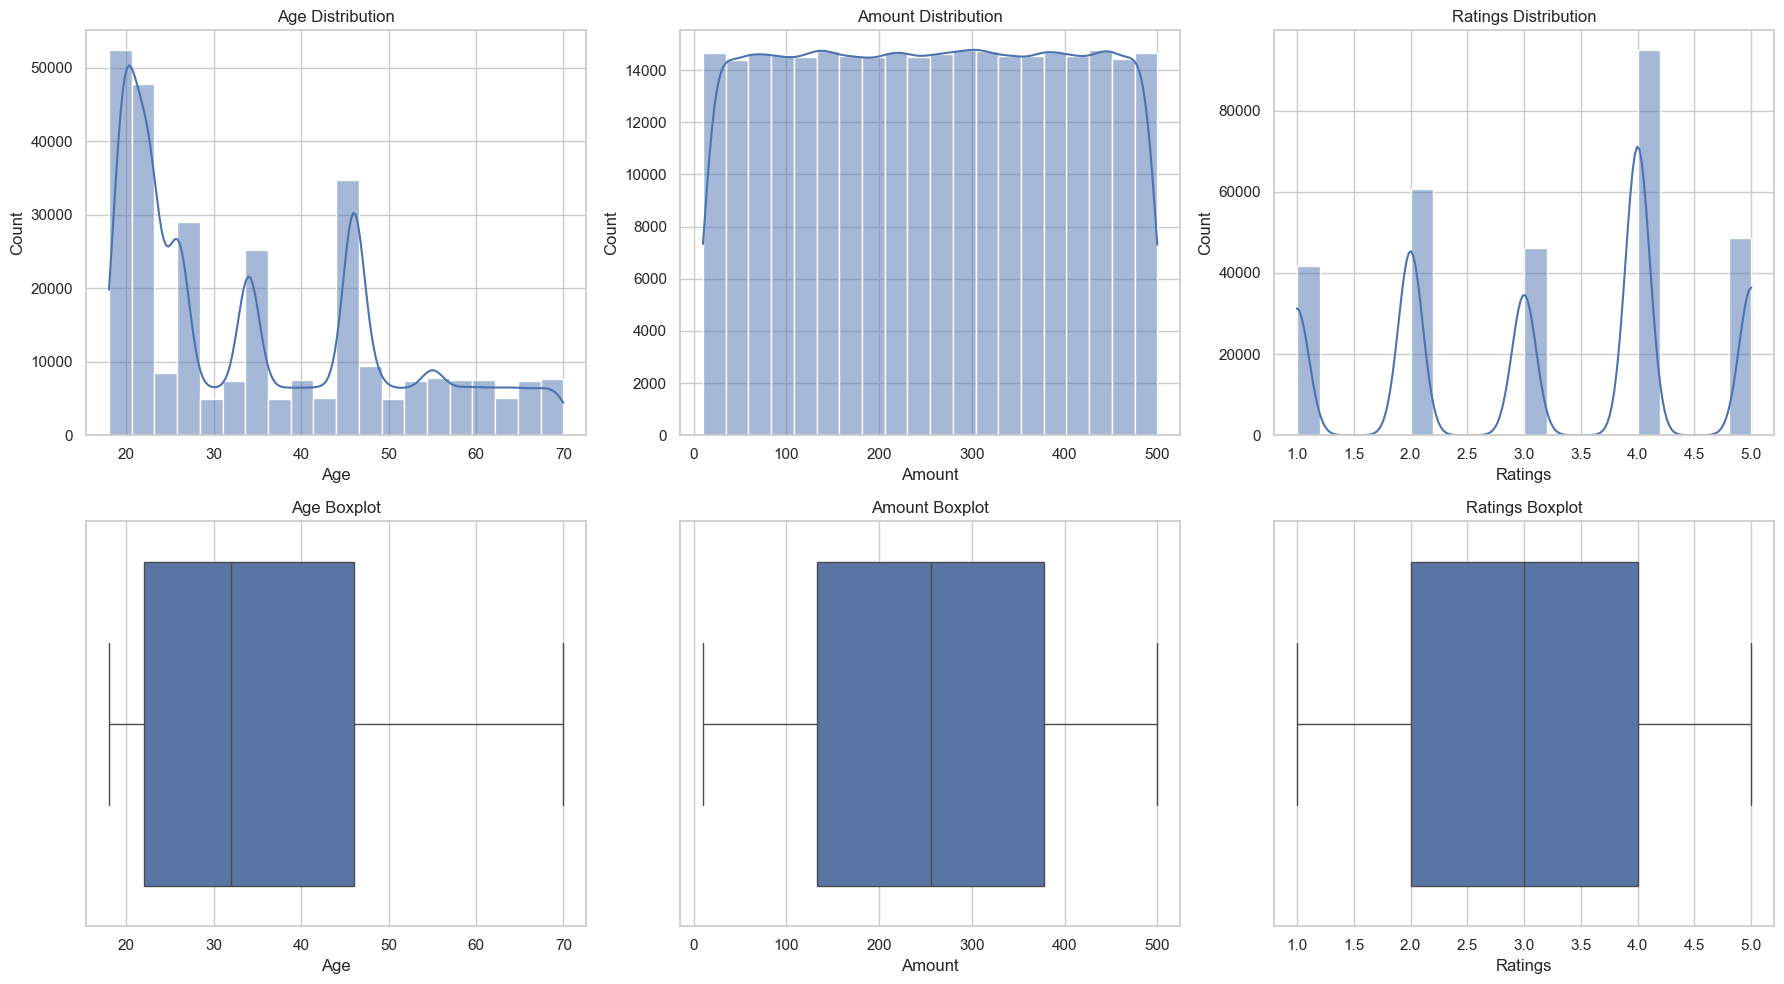

In [65]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Distribution plots
sns.histplot(data['Age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(data['Amount'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Amount Distribution')

sns.histplot(data['Ratings'], bins=20, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Ratings Distribution')

# Boxplots
sns.boxplot(x=data['Age'], ax=axs[1, 0])
axs[1, 0].set_title('Age Boxplot')

sns.boxplot(x=data['Amount'], ax=axs[1, 1])
axs[1, 1].set_title('Amount Boxplot')

sns.boxplot(x=data['Ratings'], ax=axs[1, 2])
axs[1, 2].set_title('Ratings Boxplot')

# Adjust layout
plt.tight_layout()
plt.show()

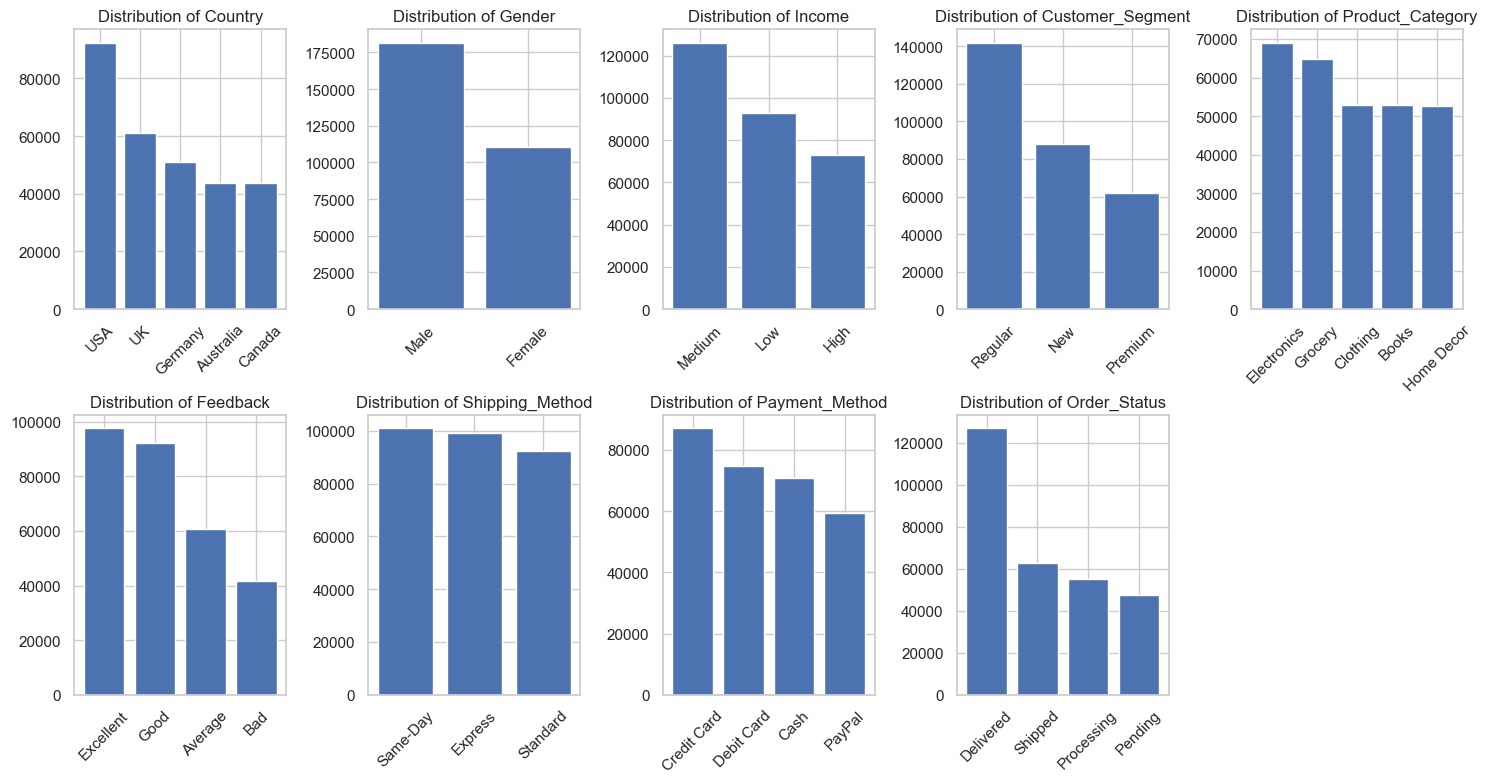

In [67]:
# Select categorical columns
categorical_columns = ['Country', 'Gender', 'Income', 'Customer_Segment', 
                       'Product_Category', 'Feedback', 'Shipping_Method',
                       'Payment_Method', 'Order_Status']

# Set the size of the plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, (len(categorical_columns) + 1) // 2, i)  # Create subplots
    value_counts = data[col].value_counts()  # Get value counts for each column
    plt.bar(value_counts.index, value_counts.values)  # Create bar plot
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [69]:
# Calculate total revenue for each order status
total_revenue_delivered = data[data['Order_Status'] == 'Delivered']['Amount'].sum()
total_revenue_shipped = data[data['Order_Status'] == 'Shipped']['Amount'].sum()
total_revenue_processing = data[data['Order_Status'] == 'Processing']['Amount'].sum()
total_revenue_pending = data[data['Order_Status'] == 'Pending']['Amount'].sum()

# Calculate the total revenue from not completed orders
total_revenue_not_completed = total_revenue_shipped + total_revenue_processing + total_revenue_pending

# Calculate the difference
revenue_difference = total_revenue_not_completed - total_revenue_delivered

# Convert to millions and format as currency
total_revenue_delivered_millions = total_revenue_delivered / 1_000_000
total_revenue_not_completed_millions = total_revenue_not_completed / 1_000_000
revenue_difference_millions = revenue_difference / 1_000_000
# Print the results in millions or currency format
print(f"Total Revenue from Completed Orders: ${total_revenue_delivered_millions:.2f} million")
print(f"Total Revenue from Not Completed Orders: ${total_revenue_not_completed_millions:.2f} million")
print(f"Revenue Difference (Not Completed - Completed): ${revenue_difference_millions:.2f} million")

# Identify which order statuses lost money
order_status_revenues = {
    'Shipped': total_revenue_shipped,
    'Processing': total_revenue_processing,
    'Pending': total_revenue_pending
}

# Check for losses compared to completed orders
losses = {status: revenue for status, revenue in order_status_revenues.items() if revenue < total_revenue_delivered}

if losses:
    print("\nOrder statuses that lost money compared to completed orders:")
    for status, revenue in losses.items():
        revenue_millions = revenue / 1_000_000
        print(f"{status}: ${revenue_millions:.2f} million")
else:
    print("\nNo order statuses lost money compared to completed orders.")


Total Revenue from Completed Orders: $32.30 million
Total Revenue from Not Completed Orders: $42.23 million
Revenue Difference (Not Completed - Completed): $9.93 million

Order statuses that lost money compared to completed orders:
Shipped: $16.07 million
Processing: $14.06 million
Pending: $12.09 million


In [71]:
# Filter for completed and not completed orders
completed_orders = data[data['Order_Status'] == 'Delivered']
not_completed_orders = data[data['Order_Status'] != 'Delivered']

# Group by 'new_customer_id' to calculate total spent for completed and not completed orders
customer_totals_completed_orders = completed_orders.groupby('new_customer_id').agg(
    completed_amount=('Amount', 'sum')  # Sum of Amount for completed transactions
).reset_index()

customer_totals_not_completed_orders = not_completed_orders.groupby('new_customer_id').agg(
    not_completed_amount=('Amount', 'sum')  # Sum of Amount for not completed transactions
).reset_index()

# Merge the two DataFrames on 'new_customer_id'
customer_orders = pd.merge(customer_totals_completed_orders, customer_totals_not_completed_orders, on='new_customer_id', how='outer')
# Fill missing values with 0
customer_orders.fillna(0, inplace=True)

# Perform T-test
t_statistic, p_value = ttest_ind(
    customer_orders['completed_amount'], 
    customer_orders['not_completed_amount'], 
    equal_var=False  # Set to False if the variances are not assumed to be equal
)

# Print T-test results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The difference in average amount spent between completed and not completed orders is statistically significant.")
else:
    print("There is no significant difference in average amount spent between completed and not completed orders.")

T-statistic: -72.85863132645089
P-value: 0.0
The difference in average amount spent between completed and not completed orders is statistically significant.


In [73]:
# Filter for each order status category
shipped_orders = data[data['Order_Status'] == 'Shipped']
processing_orders = data[data['Order_Status'] == 'Processing']
pending_orders = data[data['Order_Status'] == 'Pending']
delivered_orders = data[data['Order_Status'] == 'Delivered']

# Group by 'new_customer_id' to calculate total amount for each status
customer_totals_shipped = shipped_orders.groupby('new_customer_id').agg(
    shipped_amount=('Amount', 'sum')  # Sum of Amount for shipped transactions
).reset_index()

customer_totals_processing = processing_orders.groupby('new_customer_id').agg(
    processing_amount=('Amount', 'sum')  # Sum of Amount for processing transactions
).reset_index()

customer_totals_pending = pending_orders.groupby('new_customer_id').agg(
    pending_amount=('Amount', 'sum')  # Sum of Amount for pending transactions
).reset_index()

customer_totals_delivered = delivered_orders.groupby('new_customer_id').agg(
    delivered_amount=('Amount', 'sum')  # Sum of Amount for delivered transactions
).reset_index()

# Merge the four DataFrames on 'new_customer_id'
customer_orders = pd.merge(customer_totals_shipped, customer_totals_processing, on='new_customer_id', how='outer')
customer_orders = pd.merge(customer_orders, customer_totals_pending, on='new_customer_id', how='outer')
customer_orders = pd.merge(customer_orders, customer_totals_delivered, on='new_customer_id', how='outer').set_index('new_customer_id')

# Fill missing values with 0
customer_orders.fillna(0, inplace=True)

# Perform ANOVA
f_statistic, p_value = f_oneway(
    customer_orders['shipped_amount'],
    customer_orders['processing_amount'],
    customer_orders['pending_amount'],
    customer_orders['delivered_amount']
)

# Print ANOVA results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There are significant differences in the amounts spent across different order statuses.")
else:
    print("There are no significant differences in the amounts spent across different order statuses.")    

F-statistic: 16152.045600508161
P-value: 0.0
There are significant differences in the amounts spent across different order statuses.


In [75]:
# Perform Tukey's HSD Test for pairwise comparison
melted_data = customer_orders.reset_index().melt(id_vars='new_customer_id', 
                                                  value_vars=['shipped_amount', 'processing_amount', 'pending_amount','delivered_amount'],
                                                  var_name='Order_Status', value_name='Amount_Spent')

tukey_result = pairwise_tukeyhsd(endog=melted_data['Amount_Spent'], groups=melted_data['Order_Status'], alpha=0.05)

# Print Tukey's results
print(tukey_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj  lower    upper   reject
---------------------------------------------------------------------------
 delivered_amount    pending_amount -81.2548   0.0 -82.3188 -80.1908   True
 delivered_amount processing_amount -73.3339   0.0 -74.3979   -72.27   True
 delivered_amount    shipped_amount -65.2621   0.0 -66.3261 -64.1981   True
   pending_amount processing_amount   7.9209   0.0   6.8569   8.9848   True
   pending_amount    shipped_amount  15.9927   0.0  14.9287  17.0567   True
processing_amount    shipped_amount   8.0718   0.0   7.0078   9.1358   True
---------------------------------------------------------------------------


In [77]:
# Create a contingency table for Shipping_Method and Order_Status
contingency_table = pd.crosstab(data['Shipping_Method'], data['Order_Status'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

# Interpret the result
if p_val < 0.05:
    print("There is a significant association between Shipping_Method and Order_Status (Reject Null Hypothesis).")
else:
    print("There is no significant association between Shipping_Method and Order_Status (Fail to Reject Null Hypothesis).")

Chi-square Statistic: 114.69710770486155
P-value: 2.1134756986685152e-22
Degrees of Freedom: 6
There is a significant association between Shipping_Method and Order_Status (Reject Null Hypothesis).


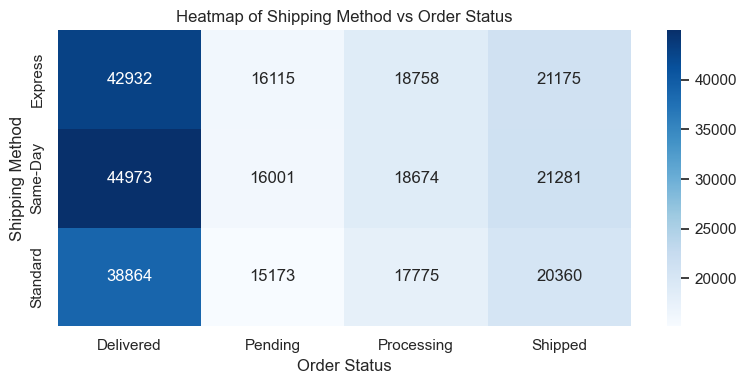

In [79]:
# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

plt.title('Heatmap of Shipping Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

In [81]:
# Create a contingency table for Shipping_Method and Order_Status
contingency_table = pd.crosstab(data['Payment_Method'], data['Order_Status'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

# Interpret the result
if p_val < 0.05:
    print("There is a significant association between Payment_Method and Order_Status (Reject Null Hypothesis).")
else:
    print("There is no significant association between Payment_Method and Order_Status (Fail to Reject Null Hypothesis).")

Chi-square Statistic: 325.81738882103247
P-value: 8.6136422234972e-65
Degrees of Freedom: 9
There is a significant association between Payment_Method and Order_Status (Reject Null Hypothesis).


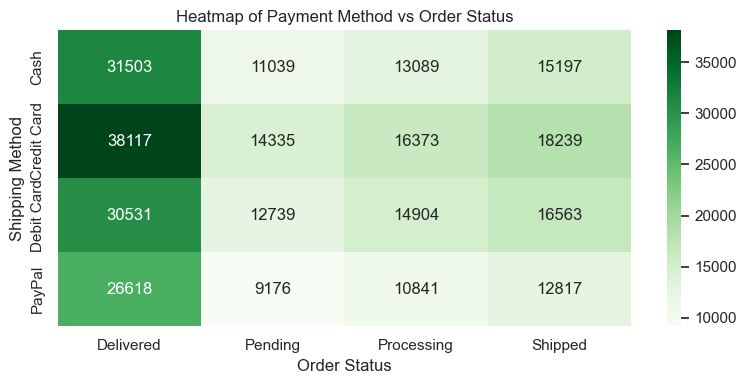

In [185]:
# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(contingency_table, annot=True, cmap="Greens", fmt="d")

plt.title('Heatmap of Payment Method vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()

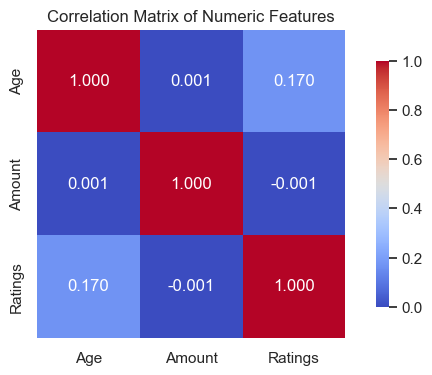

In [85]:
# Calculate the correlation matrix
# Select numeric features excluding ID columns
numeric_features_excluded_ids = data.select_dtypes(include=['int64', 
                                                            'float64']).columns.difference(['new_customer_id', 
                                                                                            'new_transaction_id'])

correlation_matrix = data[numeric_features_excluded_ids].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [87]:
# Exclude 'datetime' and other non-relevant columns
columns = data.columns.difference(['Name', 'Email', 'Phone', 'Address', 'Zipcode', 
                                   'Order_Status', 'products', 'new_customer_id', 
                                   'new_transaction_id', 'Datetime', 'Product_Brand'])

# Separate features (X) and target (y)
X = data[columns]
y = data['Order_Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize features before logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Logistic regression model (specifying multi_class='multinomial')
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_scaled, y)

# Create a DataFrame for coefficients for each target class
coefficients = pd.DataFrame(log_reg.coef_, columns=X_encoded.columns)
target_classes = log_reg.classes_
coefficients.set_index(target_classes,inplace = True)

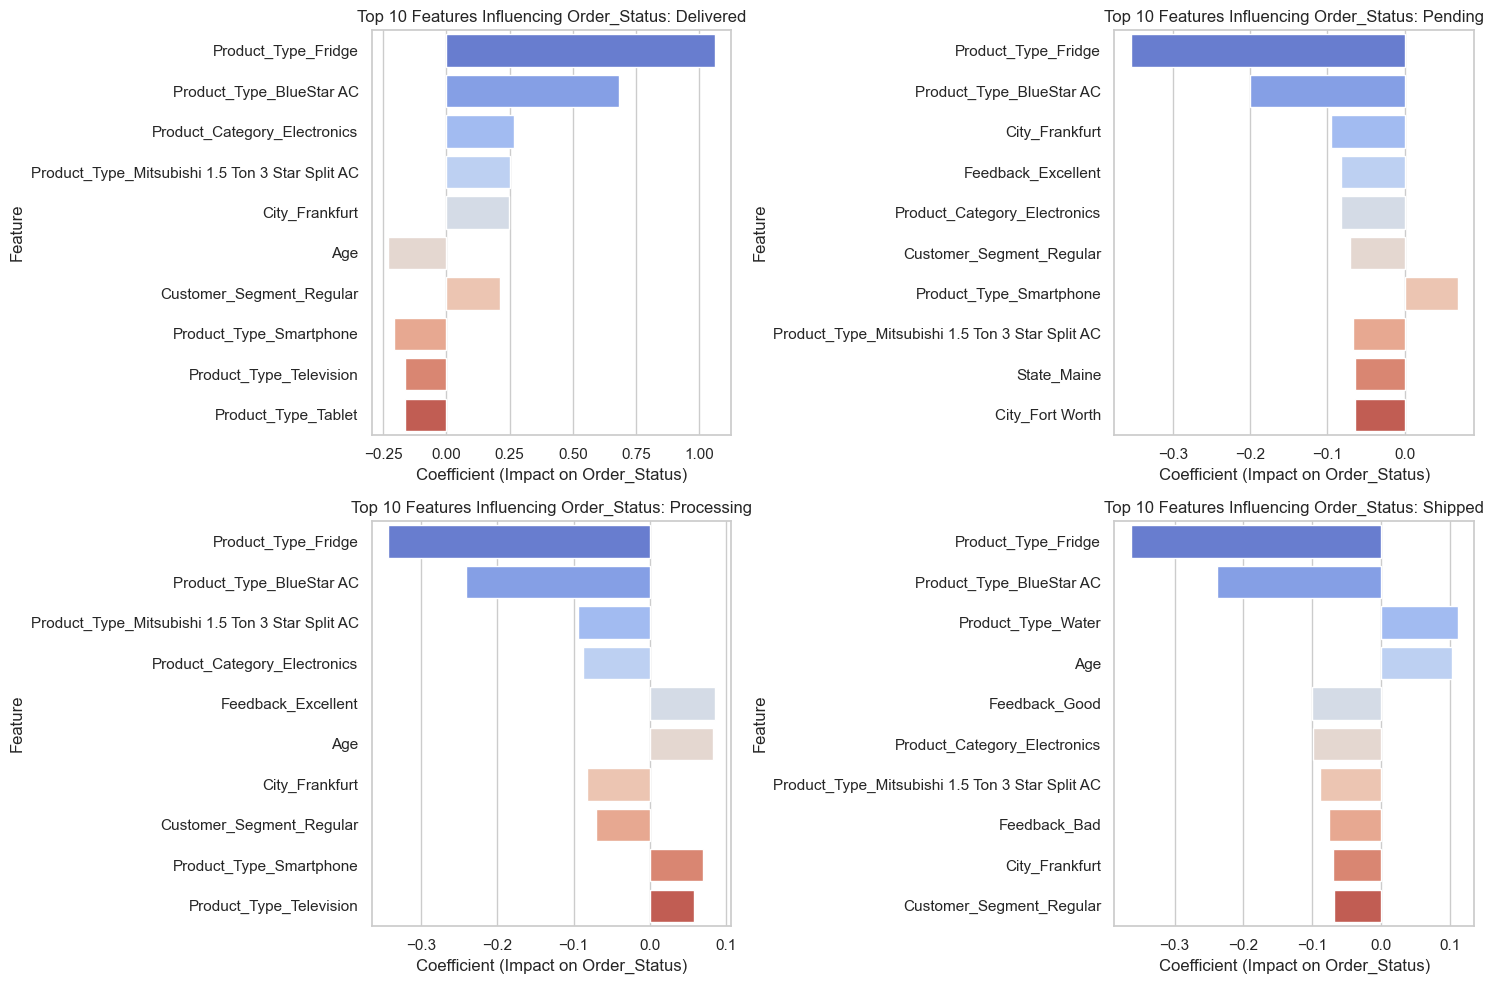

In [88]:
# Plot coefficients for each target class
plt.figure(figsize=(15, 10))

for i, target in enumerate(target_classes):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each target
    
    # Get the coefficients for the current target
    coef_with_features = coefficients.iloc[i].reset_index()
    coef_with_features.columns = ['Feature', 'Coefficient']
    
    # Calculate absolute coefficients for sorting
    coef_with_features['Abs_Coefficient'] = coef_with_features['Coefficient'].abs()
    
    # Sort by absolute value and get the top 10
    top_features = coef_with_features.sort_values('Abs_Coefficient', ascending=False).head(10)

    # Plot the coefficients
    sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
    
    # Add labels and title
    plt.title(f'Top 10 Features Influencing Order_Status: {target}')
    plt.xlabel('Coefficient (Impact on Order_Status)')
    plt.ylabel('Feature')
plt.tight_layout()
plt.show()

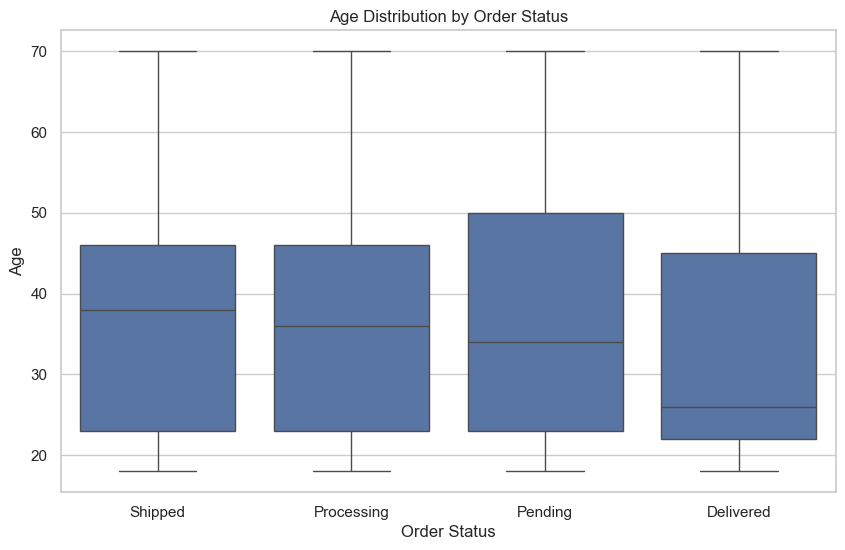

In [91]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Order_Status', y='Age')

# Add title and labels
plt.title('Age Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Age')

# Show the plot
plt.show()

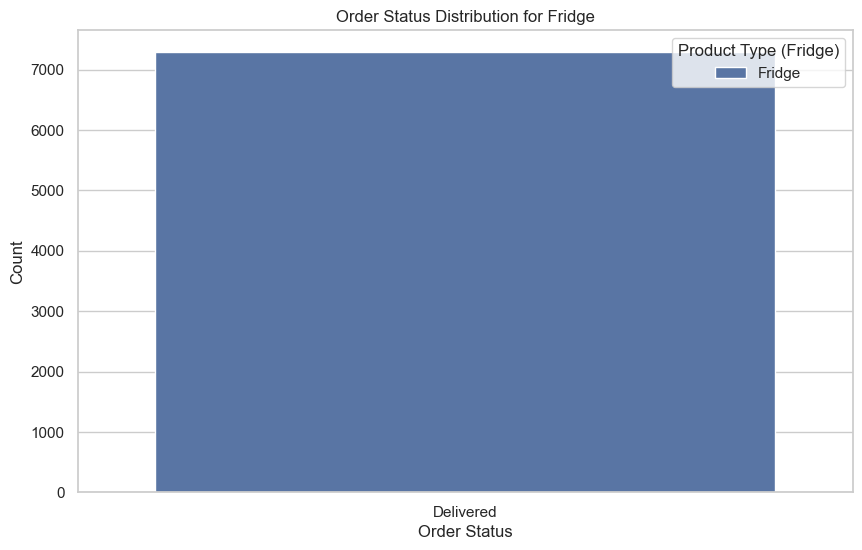

In [93]:
# Filter the dataset
data_filtered = data[data['Product_Type'] == 'Fridge']

# Count plot of Order_Status based on Product_Type_Fridge
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Type')
plt.title('Order Status Distribution for Fridge')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (Fridge)')
plt.show()

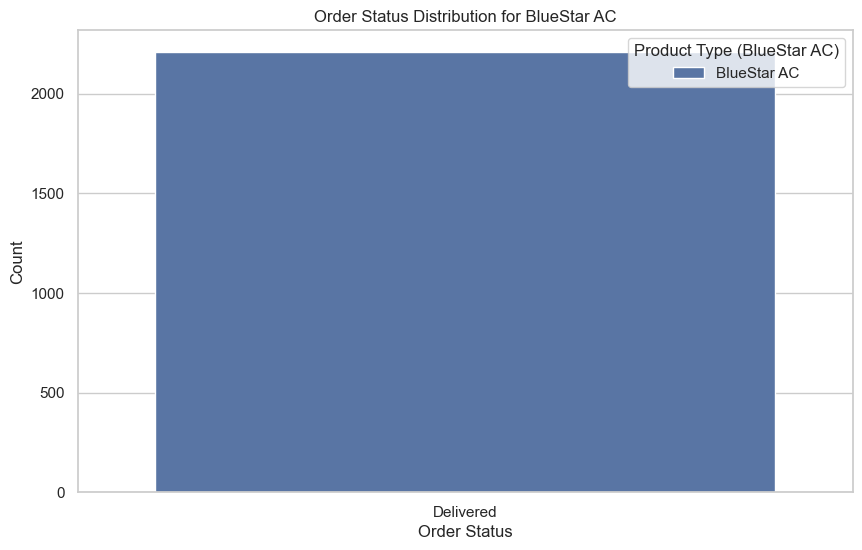

In [95]:
# Filter the dataset
data_filtered = data[data['Product_Type'] == 'BlueStar AC']

# Count plot of Order_Status based on Product_Type_BlueStar AC
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Type')
plt.title('Order Status Distribution for BlueStar AC')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (BlueStar AC)')
plt.show()

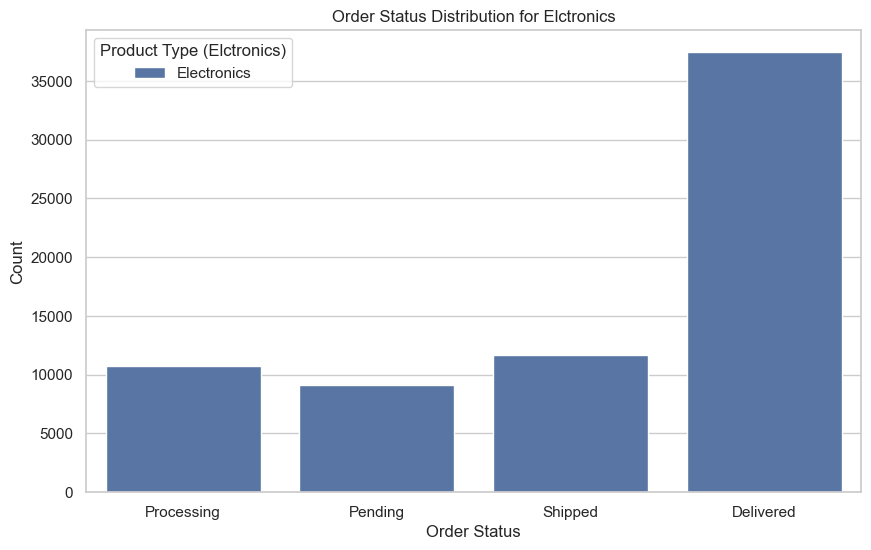

In [97]:
# Filter the dataset
data_filtered = data[data['Product_Category'] == 'Electronics']

# Count plot of Order_Status based on Product_Category_Electronics
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered, x='Order_Status', hue='Product_Category')
plt.title('Order Status Distribution for Elctronics')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.legend(title='Product Type (Elctronics)')
plt.show()


In [99]:
# Filter for delivered orders
delivered_orders = data[data['Order_Status'] == 'Delivered']

# Define age groups
bins = [18, 25, 35, 45, 100]  # Define the age bins
labels = ['18-25', '25-35', '35-45', '46+']  # Define the labels for the groups

# Create a new column for age groups
delivered_orders['Age_Group'] = pd.cut(delivered_orders['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate total amount and total purchases
age_group_summary = delivered_orders.groupby('Age_Group').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Age_Group', 'count')
).reset_index()

# Convert amount to millions and total purchases to thousands
age_group_summary['Total_Amount_Millions'] = age_group_summary['Total_Amount_Millions'] / 1_000_000
age_group_summary['Total_Purchases_K'] = age_group_summary['Total_Purchases_K'] / 1_000

# Display the summary
age_group_summary = age_group_summary.sort_values(by='Total_Amount_Millions', ascending=False)
age_group_summary

Age_Group  Total_Amount_Millions  Total_Purchases_K
0     18-25              13.885038             54.442
1     25-35               8.300571             32.657
3       46+               8.141918             31.929
2     35-45               1.976620              7.741

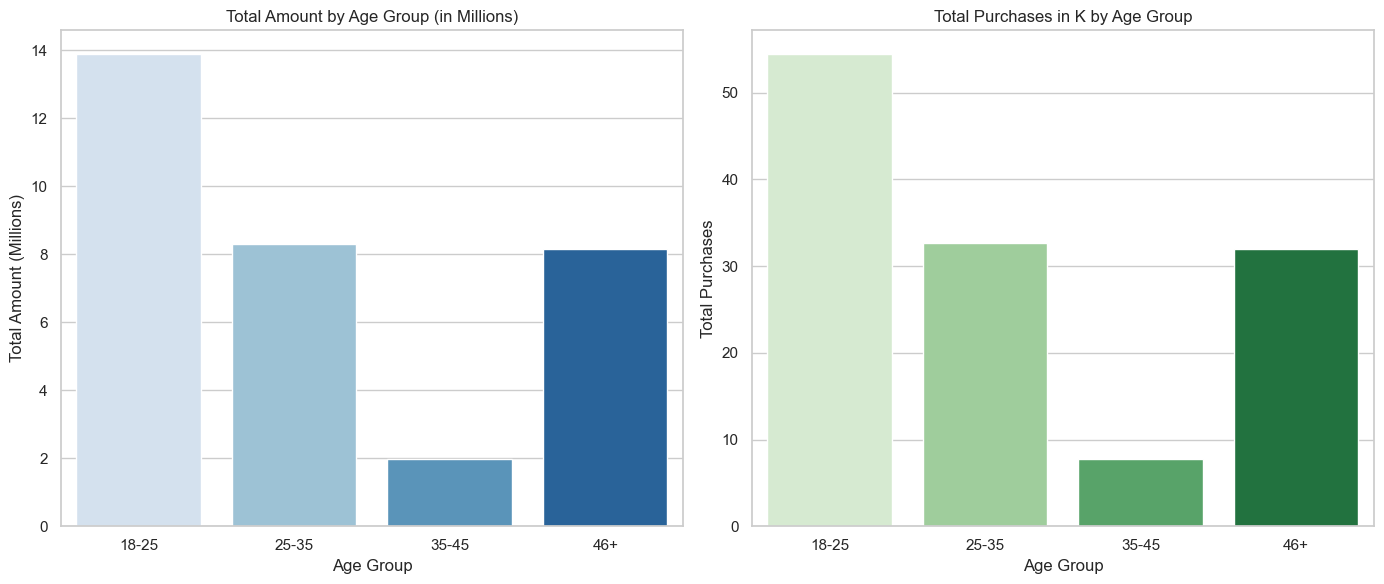

In [101]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure with two subplots
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Plot Total Amount
sns.barplot(data=age_group_summary, x='Age_Group', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by Age Group (in Millions)')
ax1[0].set_xlabel('Age Group')
ax1[0].set_ylabel('Total Amount (Millions)')

# Plot Total Purchases
sns.barplot(data=age_group_summary, x='Age_Group', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by Age Group')
ax1[1].set_xlabel('Age Group')
ax1[1].set_ylabel('Total Purchases')

# Show the plots
plt.tight_layout()
plt.show()


In [103]:
# Group by City and calculate total amount and total purchases for delivered orders
city_summary = delivered_orders.groupby('City').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('City', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
city_summary['Total_Amount_Millions'] = city_summary['Total_Amount_Millions'] / 1000000
city_summary['Total_Purchases_K'] = city_summary['Total_Purchases_K'] / 1000

# Sort city summary data by Total_Amount_Millions for better visualization
city_summary_sorted = city_summary.sort_values(by='Total_Amount_Millions', ascending=False).head(10)
city_summary_sorted

City  Total_Amount_Millions  Total_Purchases_K
100     Portsmouth               2.929678             11.516
107  San Francisco               2.503368              9.807
44       Frankfurt               2.191669              8.609
26         Chicago               1.356801              5.358
43      Fort Worth               1.148822              4.540
16          Boston               0.593256              2.328
67          London               0.418267              1.686
84        New York               0.372657              1.456
32          Darwin               0.243578              0.942
122       Victoria               0.238930              0.940

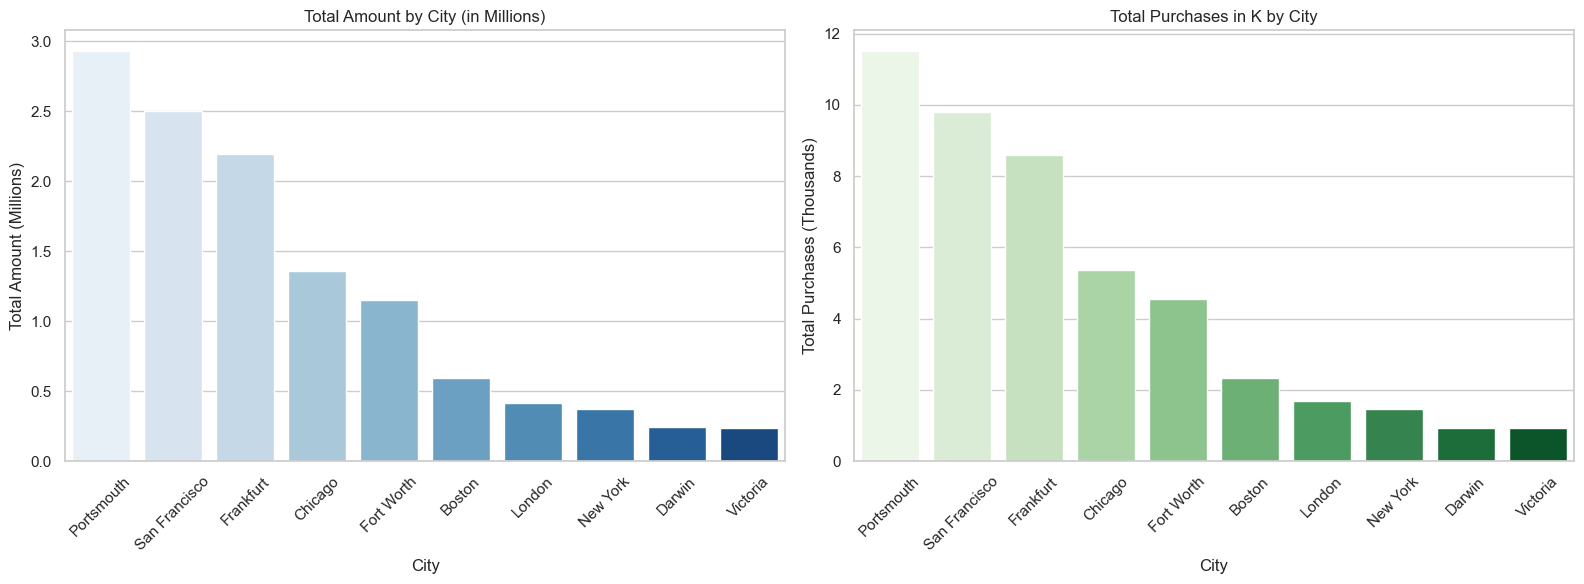

In [105]:
# Create a figure with two subplots for Total Amount and Total Purchases by City
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by City
sns.barplot(data=city_summary_sorted, x='City', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by City (in Millions)')
ax1[0].set_xlabel('City')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by City
sns.barplot(data=city_summary_sorted, x='City', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by City')
ax1[1].set_xlabel('City')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [107]:
# Group by State and calculate total amount and total purchases for delivered orders
state_summary = delivered_orders.groupby('State').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('State', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
state_summary['Total_Amount_Millions'] = state_summary['Total_Amount_Millions'] / 1000000
state_summary['Total_Purchases_K'] = state_summary['Total_Purchases_K'] / 1000

# Sort state summary data by Total_Amount_Millions for better visualization
state_summary_sorted = state_summary.sort_values(by='Total_Amount_Millions', ascending=False).head(10)

# Display the sorted state summary
state_summary_sorted

State  Total_Amount_Millions  Total_Purchases_K
9           England               7.126354             27.972
4            Berlin               6.367549             24.979
33  New South Wales               4.455755             17.384
39          Ontario               4.414292             17.422
20            Maine               2.508666              9.831
7       Connecticut               1.368825              5.385
32       New Mexico               1.160652              4.565
11          Georgia               0.586149              2.337
17           Kansas               0.385991              1.505
34         New York               0.099645              0.392

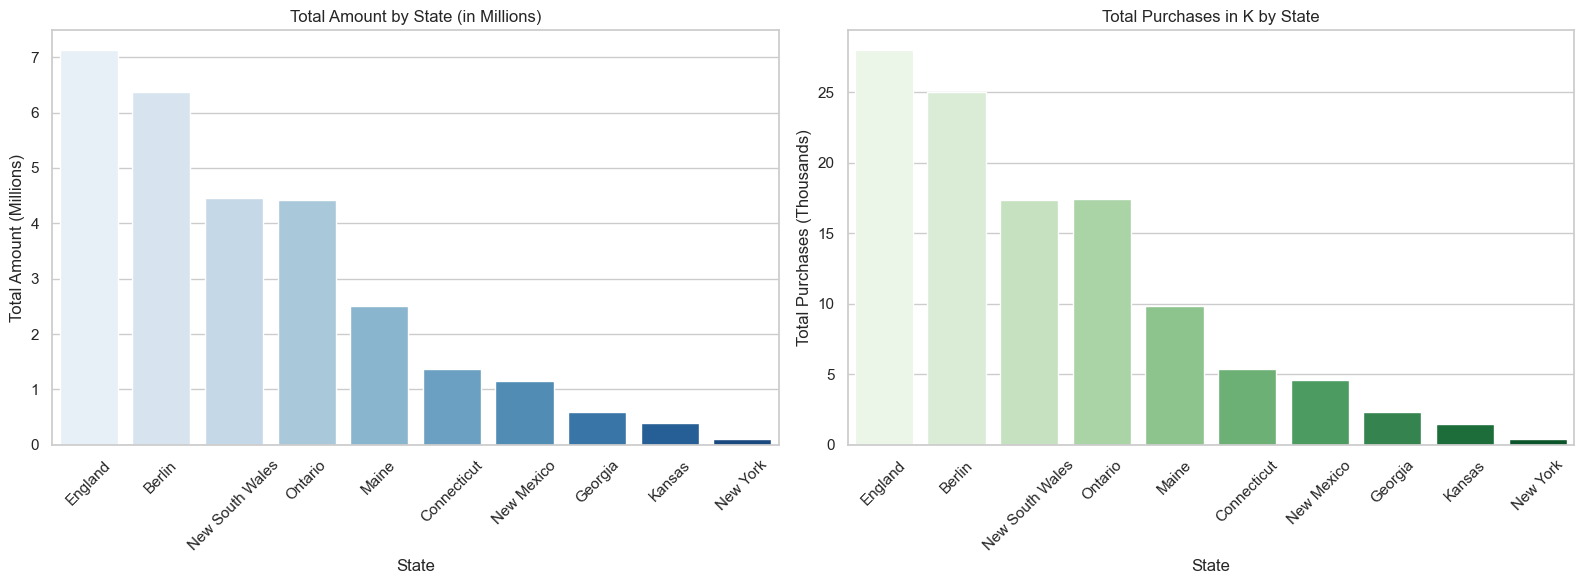

In [109]:
# Create a figure with two subplots for Total Amount and Total Purchases by State
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by State
sns.barplot(data=state_summary_sorted, x='State', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by State (in Millions)')
ax1[0].set_xlabel('State')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by State
sns.barplot(data=state_summary_sorted, x='State', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by State')
ax1[1].set_xlabel('State')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


In [111]:
# Group by Country and calculate total amount and total purchases for delivered orders
country_summary = delivered_orders.groupby('Country').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Country', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
country_summary['Total_Amount_Millions'] = country_summary['Total_Amount_Millions'] / 1000000
country_summary['Total_Purchases_K'] = country_summary['Total_Purchases_K'] / 1000

# Sort country summary data by Total_Amount_Millions for better visualization
country_summary_sorted = country_summary.sort_values(by='Total_Amount_Millions', ascending=False)
country_summary_sorted

Country  Total_Amount_Millions  Total_Purchases_K
4        USA               9.940197             39.012
3         UK               7.126354             27.972
2    Germany               6.367549             24.979
0  Australia               4.455755             17.384
1     Canada               4.414292             17.422

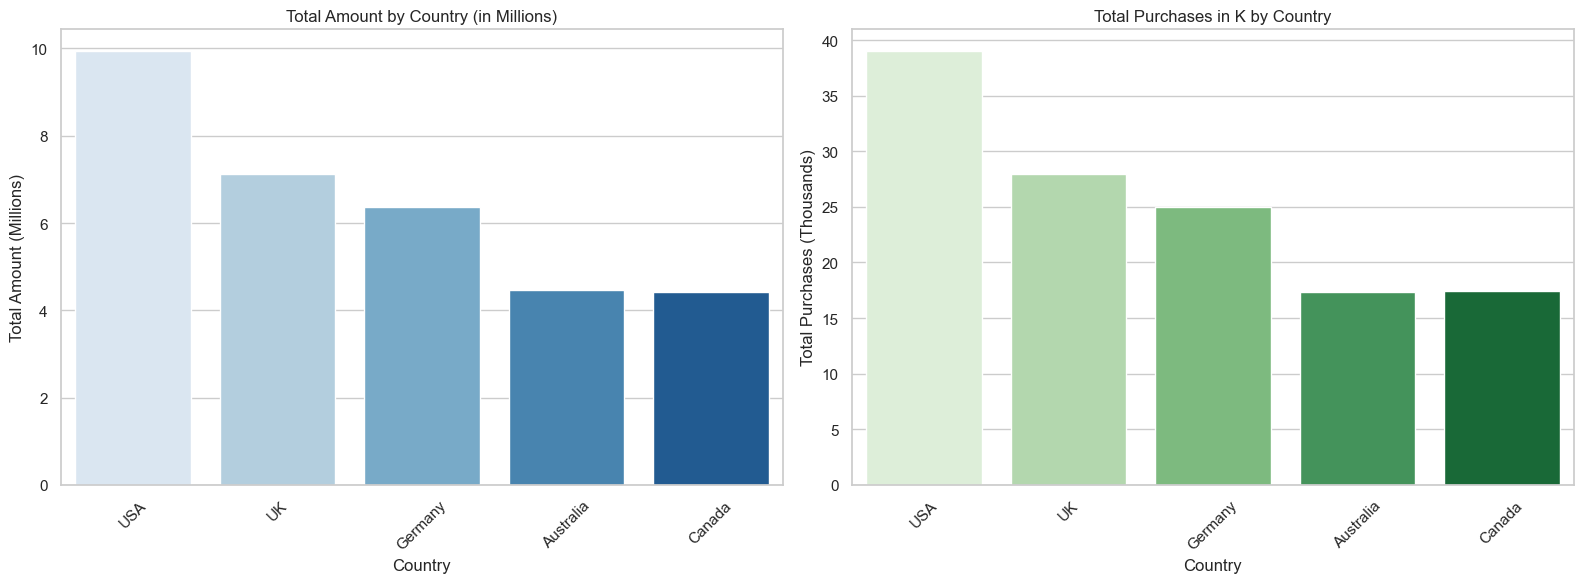

In [113]:
# Create a figure with two subplots for Total Amount and Total Purchases by Country
fig, ax1 = plt.subplots(1, 2, figsize=(16, 6))

# Plot Total Amount by Country
sns.barplot(data=country_summary_sorted, x='Country', y='Total_Amount_Millions', ax=ax1[0], palette='Blues')
ax1[0].set_title('Total Amount by Country (in Millions)')
ax1[0].set_xlabel('Country')
ax1[0].set_ylabel('Total Amount (Millions)')
ax1[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Plot Total Purchases by Country
sns.barplot(data=country_summary_sorted, x='Country', y='Total_Purchases_K', ax=ax1[1], palette='Greens')
ax1[1].set_title('Total Purchases in K by Country')
ax1[1].set_xlabel('Country')
ax1[1].set_ylabel('Total Purchases (Thousands)')
ax1[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust the layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


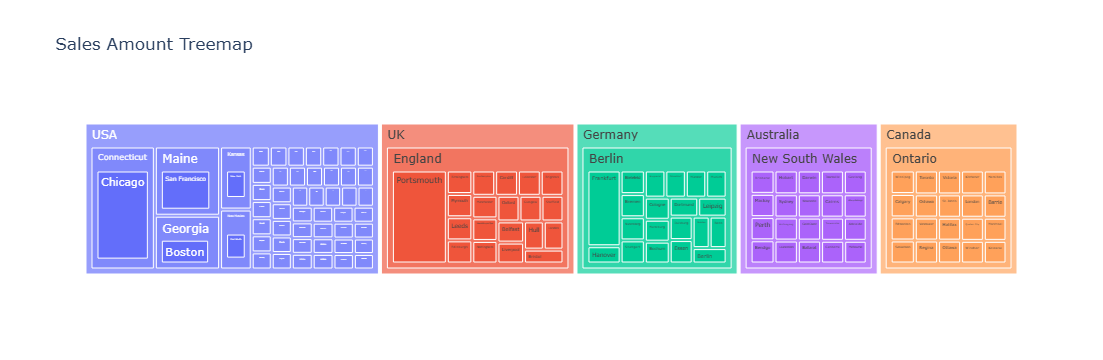

In [115]:
# Create the treemap
fig = px.treemap(
    data,
    path=['Country', 'State', 'City'],
    values='Amount',
    title='Sales Amount Treemap'
)

# Show the figure
fig

In [117]:
# Group by Income and calculate total amount and total purchases for delivered orders
income_summary = delivered_orders.groupby('Income').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Income', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
income_summary['Total_Amount_Millions'] = income_summary['Total_Amount_Millions'] / 1000000
income_summary['Total_Purchases_K'] = income_summary['Total_Purchases_K'] / 1000

# Sort income summary data by Total_Amount_Millions for better visualization
income_summary_sorted = income_summary.sort_values(by='Total_Amount_Millions', ascending=False)
income_summary_sorted

Income  Total_Amount_Millions  Total_Purchases_K
2  Medium              14.322824             56.347
1     Low               9.219838             36.050
0    High               8.761485             34.372

In [119]:
# Group by Customer Segment and calculate total amount and total purchases for delivered orders
segment_summary = delivered_orders.groupby('Customer_Segment').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Customer_Segment', 'count')
).reset_index()

# Convert the amount to millions and purchases to thousands
segment_summary['Total_Amount_Millions'] = segment_summary['Total_Amount_Millions'] / 1000000
segment_summary['Total_Purchases_K'] = segment_summary['Total_Purchases_K'] / 1000

# Sort segment summary data by Total_Amount_Millions for better visualization
segment_summary_sorted = segment_summary.sort_values(by='Total_Amount_Millions', ascending=False)
segment_summary_sorted

Customer_Segment  Total_Amount_Millions  Total_Purchases_K
2          Regular              18.938411             74.319
0              New               8.075853             31.715
1          Premium               5.289883             20.735

In [121]:
# Calculate Recency, Frequency, and Monetary values
current_date = delivered_orders['Datetime'].max()  # Get the most recent order date

# RFM calculation
rfm = delivered_orders.groupby('new_customer_id').agg(
    Recency=('Datetime', lambda x: (current_date - x.max()).days),
    Frequency=('new_transaction_id', 'count'),  # Assuming Order_ID is unique for each order
    Monetary=('Amount', 'sum')
).reset_index()

rfm.head()

new_customer_id  Recency  Frequency    Monetary
0                3       48          1  431.869395
1                8       54          1  328.839302
2                9      148          2  860.733739
3               12       58          1  161.879361
4               13      298          1  350.817016

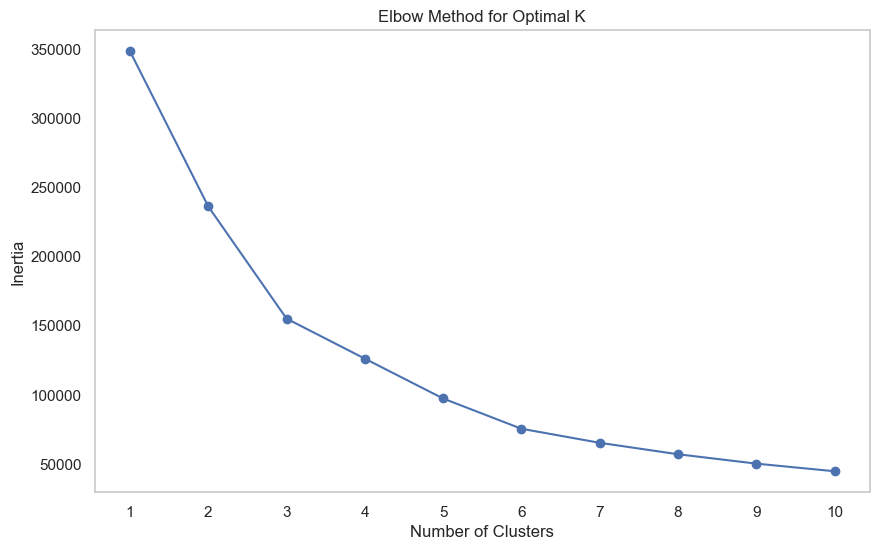

In [122]:
# Normalize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Check for 1 to 10 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

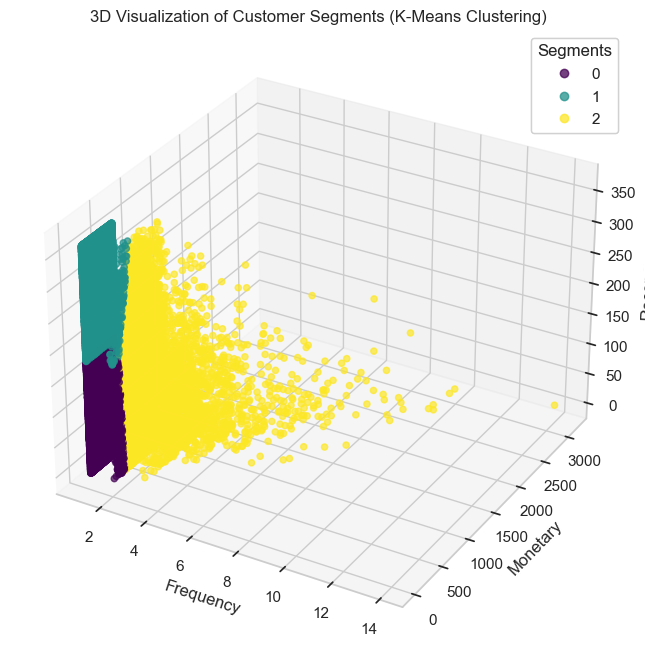

In [125]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# Map cluster labels to meaningful names based on your criteria
segment_mapping = {
    0: 'New Customers',
    1: 'Passive Customers',
    2: 'High-Value Customers'
}
rfm['Segment_Name'] = rfm['Segment'].map(segment_mapping)

# View the RFM summary
rfm_sorted = rfm.sort_values(by='Monetary', ascending=False)

# 3D Visualization of the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot using the segment codes for colors
scatter = ax.scatter(rfm['Frequency'], rfm['Monetary'], rfm['Recency'], 
                     c=rfm['Segment'], cmap='viridis', alpha=0.7)

# Labels and title
ax.set_title('3D Visualization of Customer Segments (K-Means Clustering)')
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

# Add color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Segments")
ax.add_artist(legend1)

plt.show()

In [127]:
# Group by the Segment and get descriptive statistics
segment_stats = rfm.groupby('Segment_Name')[['Recency', 'Frequency', 'Monetary']].describe()

# Display the descriptive statistics
segment_stats.T

Segment_Name     High-Value Customers  New Customers  Passive Customers
Recency   count           7597.000000   54146.000000       54402.000000
          mean             111.584310      90.865789         274.019393
          std               81.615601      52.990448          52.873438
          min                0.000000       0.000000         183.000000
          25%               43.000000      45.000000         228.000000
          50%               97.000000      91.000000         274.000000
          75%              167.000000     137.000000         320.000000
          max              358.000000     183.000000         365.000000
Frequency count           7597.000000   54146.000000       54402.000000
          mean               2.332368       1.005836           1.003419
          std                0.825777       0.076172           0.058373
          min                2.000000       1.000000           1.000000
          25%                2.000000       1.000000           1.000000
          50%                2.000000       1.000000           1.000000
          75%                2.000000       1.000000           1.000000
          max               14.000000       2.000000           2.000000
Monetary  count           7597.000000   54146.000000       54402.000000
          mean             615.860618     254.380759         254.618450
          std              288.199917     141.343815         141.440062
          min              142.049276      10.006769          10.000219
          25%              426.292492     132.664344         132.017786
          50%              566.821312     253.672627         254.784445
          75%              743.976215     377.253369         377.039162
          max             3158.551187     499.975408         499.954725

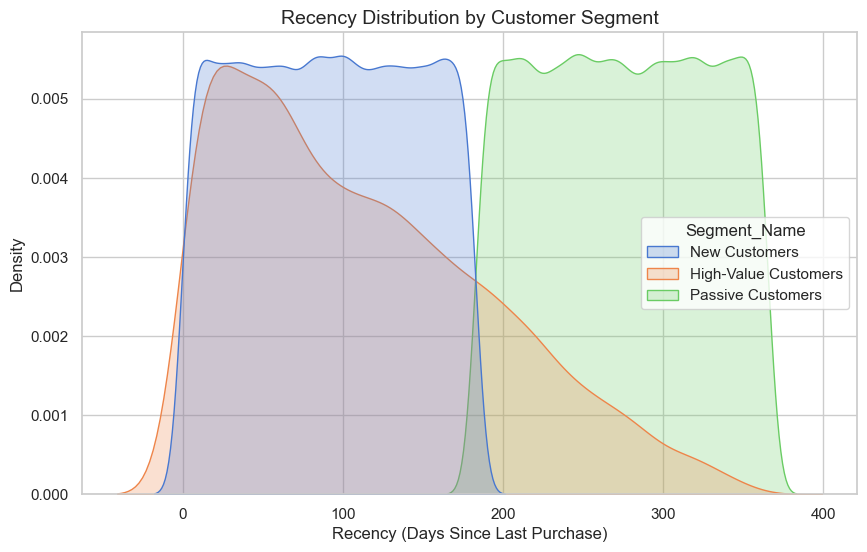

In [129]:
# Create a density plot for Recency by Segment
plt.figure(figsize=(10, 6))
sns.kdeplot(data=rfm, x='Recency', hue='Segment_Name', fill=True, common_norm=False, palette="muted")

# Set plot labels and title
plt.title('Recency Distribution by Customer Segment', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display the plot
plt.show()

In [131]:
# Merge delivered orders with RFM data
delivered_orders = delivered_orders.merge(rfm, on='new_customer_id')

# Label churn: If the customer hasn't purchased in the last 6 months, mark them as churned
delivered_orders['High_Risk_Of_Churn'] = delivered_orders['Recency'].apply(lambda x: 1 if x > 180 else 0)

# Drop irrelevant and redundant columns
columns_to_drop = [
    'new_customer_id', 'new_transaction_id', 'Segment', 'Recency', 'Country','Product_Brand',
    'Address', 'products', 'Datetime', 'Order_Status', 
    'Zipcode', 'Name', 'Email', 'Phone', 'City', 
    'Segment_Name', 'Frequency', 'Monetary'
]
delivered_orders_clean = delivered_orders.drop(columns=columns_to_drop)

# Convert 'Month' to categorical
delivered_orders_clean['Month'] = delivered_orders_clean['Month'].astype('category')
# One-Hot Encode categorical features
delivered_orders_encoded = pd.get_dummies(delivered_orders_clean, drop_first=True)

# Define features and target
X = delivered_orders_encoded.drop(columns=['High_Risk_Of_Churn'])  # Features
y = delivered_orders_encoded['High_Risk_Of_Churn']  # Target

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y)

# Get the coefficients and feature names
coefficients = logistic_model.coef_[0]  # Coefficients for the first class (churn = 1)
feature_names = X.columns

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
# Sort by absolute value of coefficients for better interpretation
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the coefficients
coef_df[['Feature', 'Coefficient']].head()

Feature  Coefficient
63  Month_3     6.589425
68  Month_8     6.571663
64  Month_4     6.528257
67  Month_7     6.512733
65  Month_5     6.488454

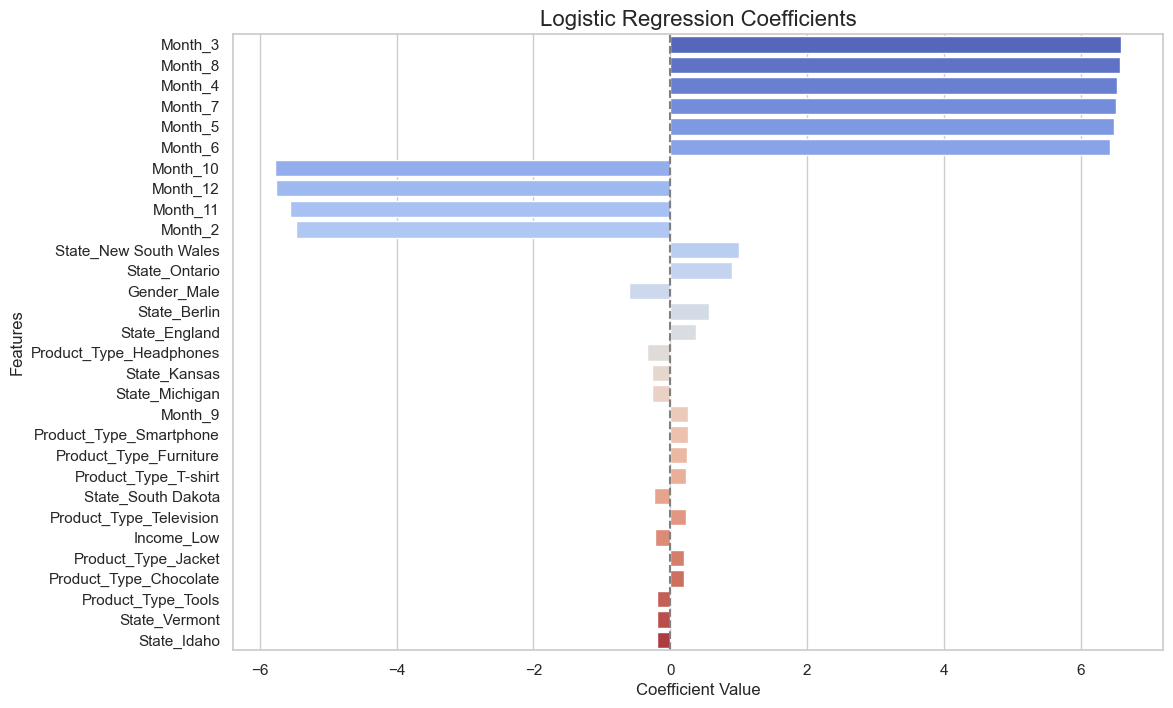

In [132]:
# Create a bar plot of the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(30), palette='coolwarm')

# Set plot title and labels
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.show()

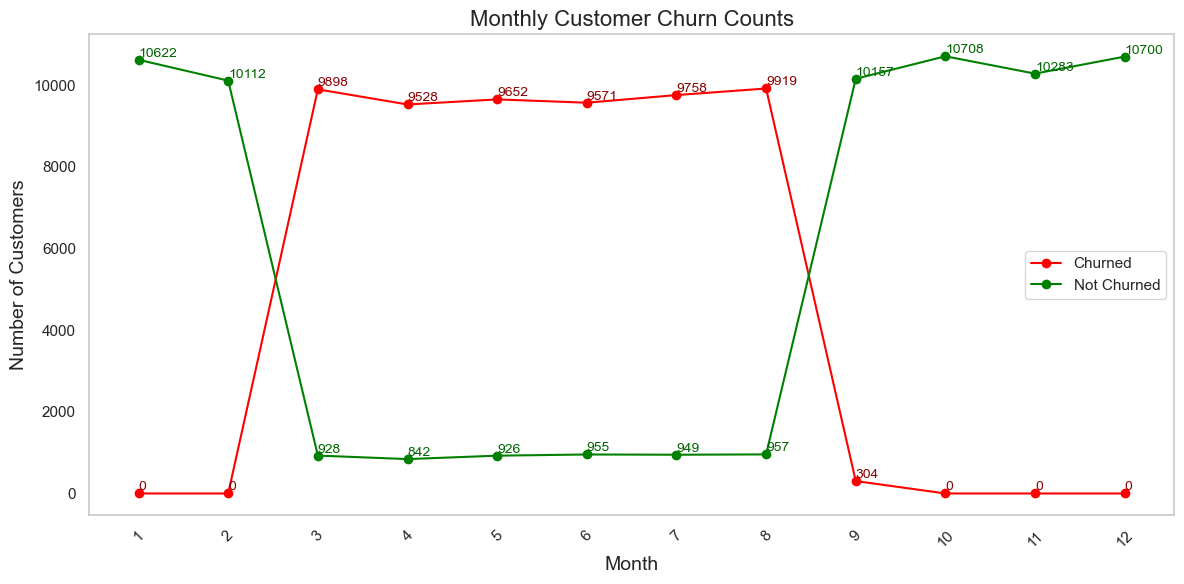

In [135]:
# Group by 'Month' and 'Churn', and count occurrences
monthly_churn_counts = delivered_orders_clean.groupby(['Month', 'High_Risk_Of_Churn']).size().reset_index(name='Count')

# Pivot the table to have Churn as columns
monthly_churn_counts_pivot = monthly_churn_counts.pivot(index='Month', columns='High_Risk_Of_Churn', values='Count').fillna(0)

# Rename columns for clarity
monthly_churn_counts_pivot.columns = ['Not Churned', 'Churned']

# Assuming monthly_churn_counts_pivot is already created
plt.figure(figsize=(12, 6))

# Plotting the churned customers
plt.plot(monthly_churn_counts_pivot.index, monthly_churn_counts_pivot['Churned'], marker='o', label='Churned', color='red')

# Plotting the not churned customers
plt.plot(monthly_churn_counts_pivot.index, monthly_churn_counts_pivot['Not Churned'], marker='o', label='Not Churned', color='green')

# Set the x-ticks to the month labels
plt.xticks(ticks=monthly_churn_counts_pivot.index, labels=monthly_churn_counts_pivot.index, rotation=45)

# Annotate each point with the corresponding count
for i in range(len(monthly_churn_counts_pivot)):
    # Annotate Churned counts
    plt.text(x=i+1, y=monthly_churn_counts_pivot['Churned'].iloc[i], 
             s=int(monthly_churn_counts_pivot['Churned'].iloc[i]), 
             ha='left', va='bottom', color='darkred', fontsize=10)

    # Annotate Not Churned counts
    plt.text(x=i+1, y=monthly_churn_counts_pivot['Not Churned'].iloc[i], 
    s=int(monthly_churn_counts_pivot['Not Churned'].iloc[i]), 
             ha='left', va='bottom', color='darkgreen', fontsize=10)

# Adding titles and labels
plt.title('Monthly Customer Churn Counts', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

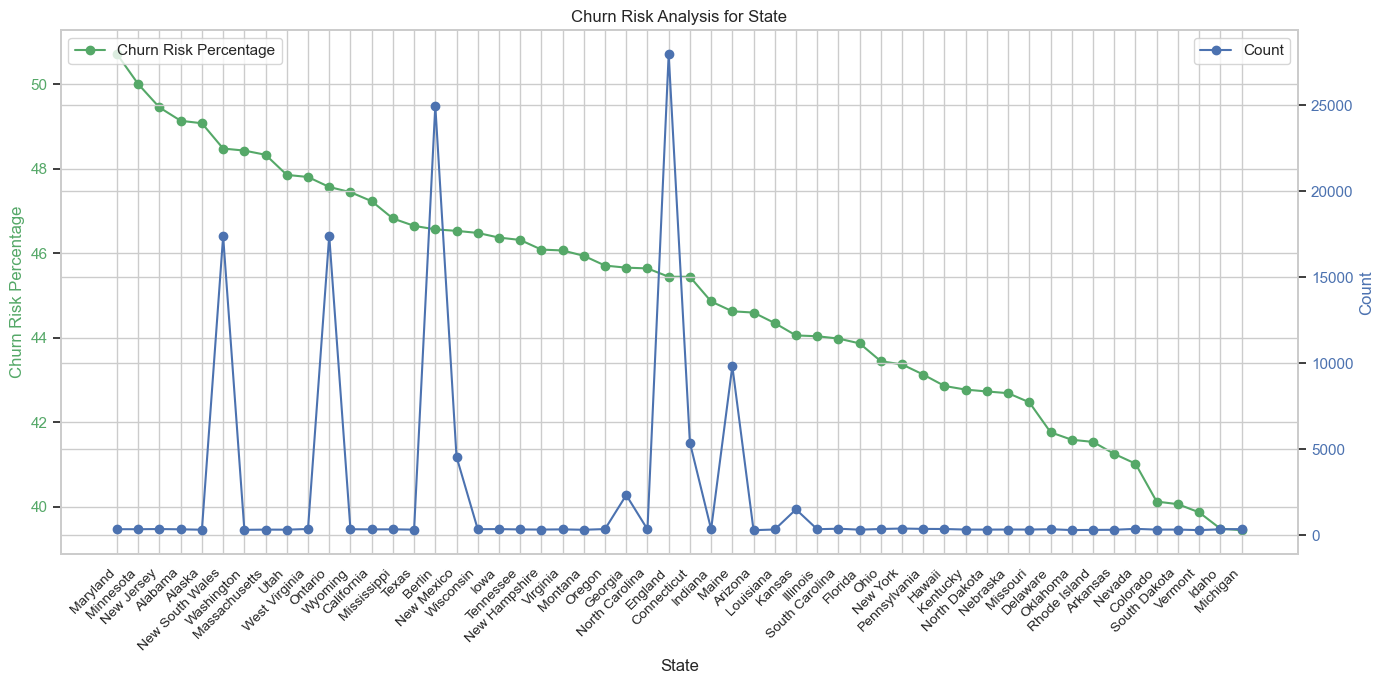

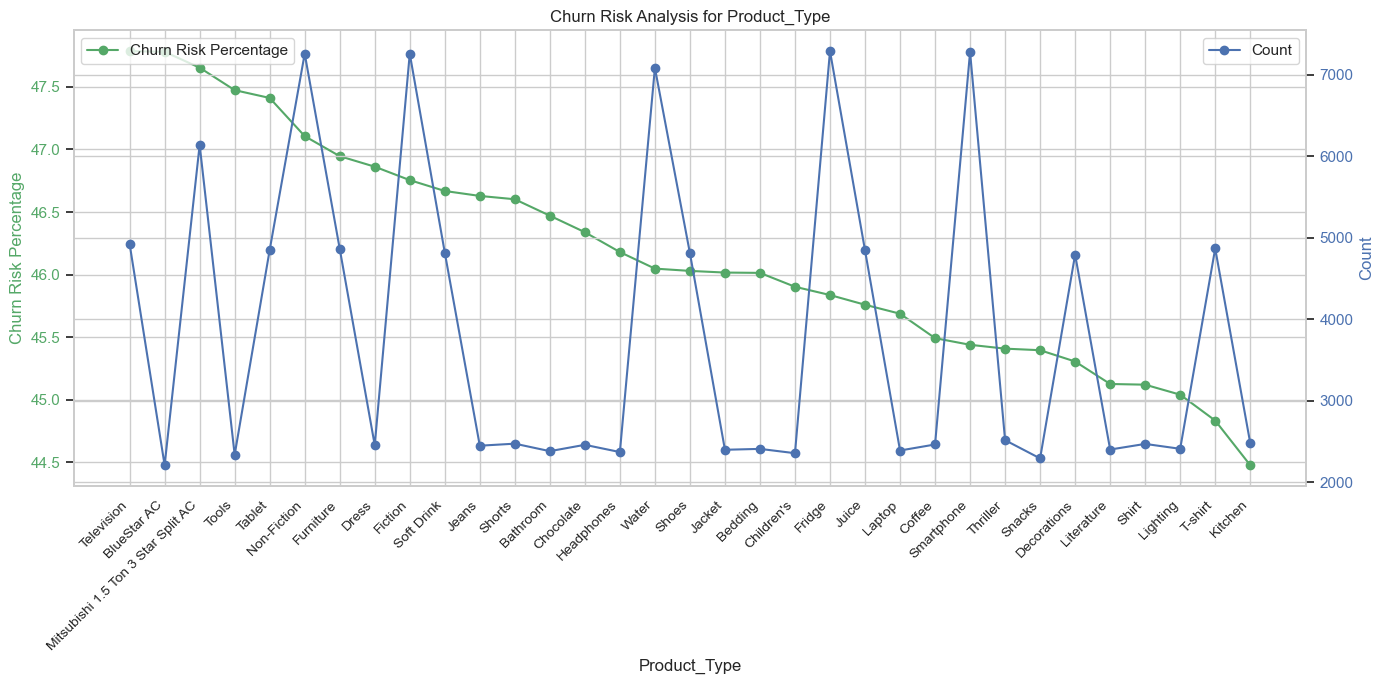

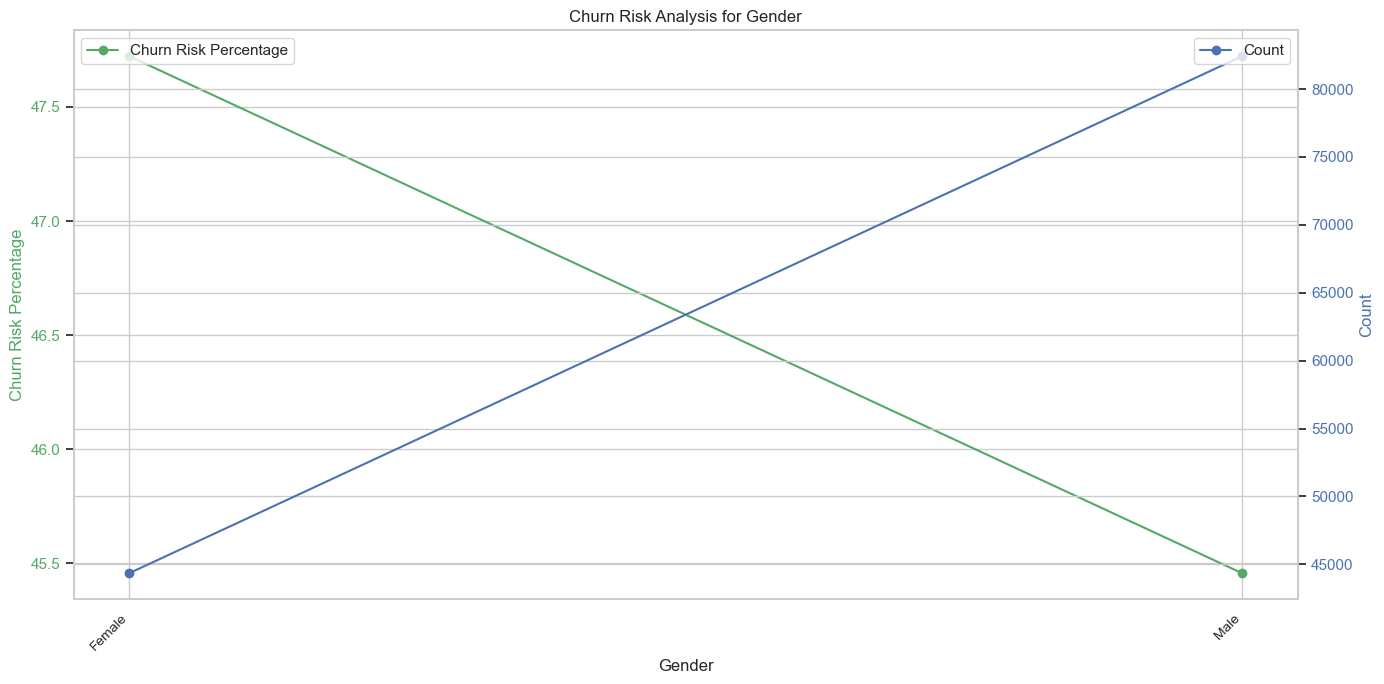

In [137]:
# Example of categorical columns to analyze
categorical_columns = ['State','Product_Type', 'Gender']

# Initialize a dictionary to hold results
churn_risk_dict = {}

# Calculate churn risk and counts for each categorical column separately
for column in categorical_columns:
    churn_risk_by_value = delivered_orders_clean.groupby(column)['High_Risk_Of_Churn'].agg(
        Churn_Risk_Percentage='mean',
        Count='size'
    ).reset_index()
    
    churn_risk_by_value['Churn_Risk_Percentage'] *= 100  # Convert to percentage
    churn_risk_by_value = churn_risk_by_value.sort_values(by='Churn_Risk_Percentage', ascending=False)

    # Rename columns for clarity
    churn_risk_by_value.columns = [column, 'Churn_Risk_Percentage', 'Count']
    churn_risk_dict[column] = churn_risk_by_value
    # Plotting
for column, df in churn_risk_dict.items():
    plt.figure(figsize=(14, 7))  # Increased figure size
    
    # Create two y-axes
    ax1 = plt.gca()  # Get current axis
    ax2 = ax1.twinx()  # Create a twin y-axis

    # Plot churn risk percentage
    ax1.plot(df[column], df['Churn_Risk_Percentage'], 'g-', marker='o', label='Churn Risk Percentage')
    ax1.set_ylabel('Churn Risk Percentage', color='g')
    ax1.tick_params(axis='y', labelcolor='g')

    # Plot count
    ax2.plot(df[column], df['Count'], 'b-', marker='o', label='Count')
    ax2.set_ylabel('Count', color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    # Title and labels
    plt.title(f'Churn Risk Analysis for {column}')
    ax1.set_xlabel(column)

    # Adjust x-ticks for better visibility
    ax1.set_xticks(range(len(df[column])))  # Set x-ticks to match data points
    ax1.set_xticklabels(df[column], rotation=45, ha='right', fontsize=10)  # Rotate and format labels

    # Legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()


In [139]:
# Group by 'new_customer_id' and aggregate the products
customer_products = delivered_orders.groupby('new_customer_id')['Product_Category'].agg(lambda x: list(x)).reset_index()

# Calculate the number of products
customer_products['number_of_products'] = customer_products['Product_Category'].apply(lambda x: len(x))

# Sort the DataFrame by 'number_of_products' in descending order
customer_products = customer_products.sort_values(by='number_of_products', ascending=False)

# Set the index to 'new_customer_id'
customer_products.set_index('new_customer_id', inplace=True)

# Display the updated DataFrame
customer_products

Product_Category  \
new_customer_id                                                      
20730            [Grocery, Clothing, Books, Grocery, Grocery, G...   
17607            [Books, Clothing, Home Decor, Books, Home Deco...   
24093            [Home Decor, Clothing, Electronics, Electronic...   
37996            [Books, Home Decor, Books, Books, Grocery, Boo...   
16594            [Books, Clothing, Books, Electronics, Grocery,...   
...                                                            ...   
54284                                                    [Grocery]   
54279                                                 [Home Decor]   
54270                                                   [Clothing]   
54267                                                [Electronics]   
248721                                                [Home Decor]   

                 number_of_products  
new_customer_id                      
20730                            14  
17607                            10  
24093                            10  
37996                            10  
16594                            10  
...                             ...  
54284                             1  
54279                             1  
54270                             1  
54267                             1  
248721                            1  

[116145 rows x 2 columns]

In [141]:
# Transform the dataset
te = TransactionEncoder()
te_ary = te.fit(customer_products['Product_Category']).transform(customer_products['Product_Category'])
basket_df = pd.DataFrame(te_ary, columns=te.columns_,index = customer_products.index)
basket_df

Books  Clothing  Electronics  Grocery  Home Decor
new_customer_id                                                   
20730             True      True         True     True        True
17607             True      True        False     True        True
24093            False      True         True     True        True
37996             True      True         True     True        True
16594             True      True         True     True        True
...                ...       ...          ...      ...         ...
54284            False     False        False     True       False
54279            False     False        False    False        True
54270            False      True        False    False       False
54267            False     False         True    False       False
248721           False     False        False    False        True

[116145 rows x 5 columns]

In [143]:
# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_df, min_support=0.0006, use_colnames=True)

# Sort the frequent itemsets by 'support' in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets

support                             itemsets
2   0.312515                        (Electronics)
3   0.201748                            (Grocery)
1   0.185243                           (Clothing)
0   0.184097                              (Books)
4   0.183168                         (Home Decor)
12  0.010668               (Electronics, Grocery)
9   0.009884              (Electronics, Clothing)
13  0.009807            (Electronics, Home Decor)
6   0.009436                 (Electronics, Books)
10  0.006673                  (Grocery, Clothing)
7   0.006647                     (Grocery, Books)
14  0.006638                (Home Decor, Grocery)
5   0.006397                    (Books, Clothing)
8   0.005984                  (Home Decor, Books)
11  0.005855               (Home Decor, Clothing)
18  0.001610        (Electronics, Grocery, Books)
24  0.001610   (Electronics, Home Decor, Grocery)
21  0.001567     (Electronics, Grocery, Clothing)
15  0.001438       (Electronics, Books, Clothing)
22  0.001429  (Electronics, Home Decor, Clothing)
19  0.001421     (Electronics, Home Decor, Books)
16  0.001119           (Grocery, Books, Clothing)
20  0.001093         (Grocery, Home Decor, Books)
17  0.000990        (Home Decor, Books, Clothing)
23  0.000878      (Home Decor, Grocery, Clothing)

In [145]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules.sort_values(by='confidence', ascending=False)[['antecedents','consequents','antecedent support'
                                                             ,'consequent support','support','confidence','lift']]
rules.head(10)

antecedents    consequents  antecedent support  \
14  (Home Decor, Clothing)  (Electronics)            0.005855   
5    (Home Decor, Grocery)  (Electronics)            0.006638   
2         (Books, Grocery)  (Electronics)            0.006647   
17     (Home Decor, Books)  (Electronics)            0.005984   
8      (Grocery, Clothing)  (Electronics)            0.006673   
11       (Books, Clothing)  (Electronics)            0.006397   
23     (Home Decor, Books)      (Grocery)            0.005984   
20       (Books, Clothing)      (Grocery)            0.006397   
1     (Electronics, Books)      (Grocery)            0.009436   
25  (Home Decor, Clothing)        (Books)            0.005855   

    consequent support   support  confidence      lift  
14            0.312515  0.001429    0.244118  0.781140  
5             0.312515  0.001610    0.242542  0.776099  
2             0.312515  0.001610    0.242228  0.775093  
17            0.312515  0.001421    0.237410  0.759677  
8             0.312515  0.001567    0.234839  0.751449  
11            0.312515  0.001438    0.224764  0.719213  
23            0.201748  0.001093    0.182734  0.905754  
20            0.201748  0.001119    0.174966  0.867253  
1             0.201748  0.001610    0.170620  0.845711  
25            0.184097  0.000990    0.169118  0.918631

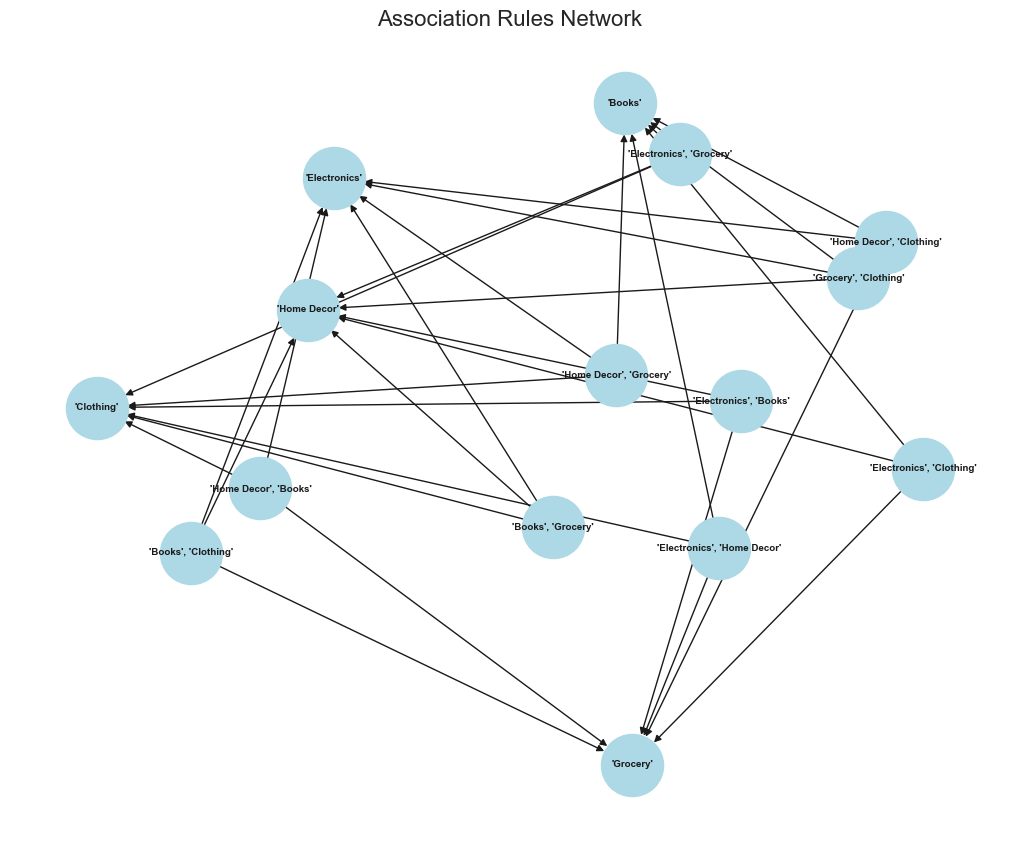

In [147]:
# Create the directed graph
G = nx.DiGraph()

# Add edges to the graph, converting frozensets to strings without the prefix
for _, row in rules.iterrows():
    antecedent = str(row['antecedents']).replace("frozenset({", "").replace("})", "")
    consequent = str(row['consequents']).replace("frozenset({", "").replace("})", "")
    G.add_edge(antecedent, consequent, weight=row['confidence'])

# Get positions for the nodes using spring layout
pos = nx.spring_layout(G, k=0.7, iterations=50)  # Adjust k for spacing

# Draw the graph with adjusted parameters
plt.figure(figsize=(10, 8))  # Adjust figure size for better layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=7, font_weight='bold', arrows=True)

# Title and display
plt.title("Association Rules Network", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

In [149]:
# Calculate metrics
degree_centrality = nx.degree_centrality(G)
pagerank = nx.pagerank(G)

# Convert metrics to DataFrames for better visualization
import pandas as pd

metrics_df = pd.DataFrame({
    'Node': list(G.nodes),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes],
    'PageRank': [pagerank[node] for node in G.nodes]
}).sort_values(by='PageRank', ascending=False)

# Display the metrics DataFrame
metrics_df

Node  Degree Centrality  PageRank
1                 'Electronics'           0.428571  0.134949
7                     'Grocery'           0.428571  0.113758
9                       'Books'           0.428571  0.111230
10                   'Clothing'           0.428571  0.107302
11                 'Home Decor'           0.428571  0.107230
0      'Home Decor', 'Clothing'           0.214286  0.042553
2       'Home Decor', 'Grocery'           0.214286  0.042553
3            'Books', 'Grocery'           0.214286  0.042553
4         'Home Decor', 'Books'           0.214286  0.042553
5         'Grocery', 'Clothing'           0.214286  0.042553
6           'Books', 'Clothing'           0.214286  0.042553
8        'Electronics', 'Books'           0.214286  0.042553
12  'Electronics', 'Home Decor'           0.214286  0.042553
13    'Electronics', 'Clothing'           0.214286  0.042553
14     'Electronics', 'Grocery'           0.214286  0.042553

In [151]:
# Create the time_series_data from delivered orders with 'Datetime' and 'Amount'
time_series_data = delivered_orders[['Datetime', 'Amount']]

# Set 'Datetime' as the index
time_series_data.set_index('Datetime', inplace=True)

# Sort the data by the 'Datetime' index
time_series_data = time_series_data.sort_index()

# Resample the data by day and sum the 'Amount', converting to K (thousands)
daily_sales = time_series_data.resample('D').sum() / 1000
daily_sales

Amount
Datetime             
2023-03-01  92.065279
2023-03-02  85.896687
2023-03-03  82.736854
2023-03-04  83.556241
2023-03-05  89.906414
...               ...
2024-02-25  88.621691
2024-02-26  92.024605
2024-02-27  95.676398
2024-02-28  92.075789
2024-02-29  92.918358

[366 rows x 1 columns]

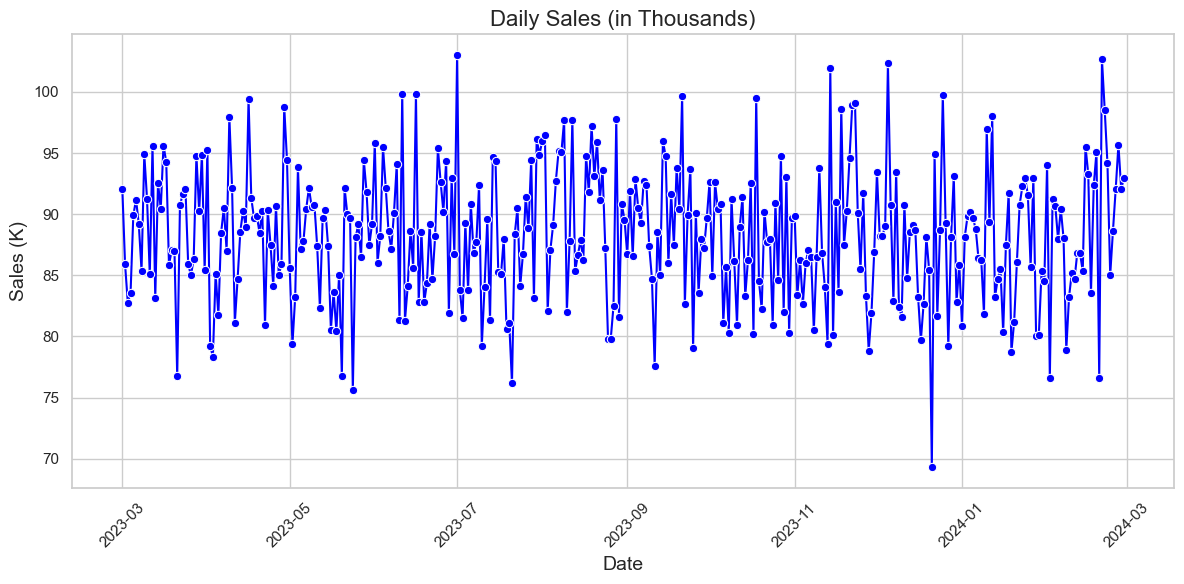

In [153]:
# Create a line plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Datetime', y='Amount', marker='o', color='blue')

# Update layout for better readability
plt.title('Daily Sales (in Thousands)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (K)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(True)  # Add grid for easier reading
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [155]:
# Perform the Augmented Dickey-Fuller test
results = adfuller(daily_sales['Amount'])

# Print the results
print("Augmented Dickey-Fuller Test Results:")
print("ADF Statistic: {:.2f}".format(results[0]))
print("p-value: {:.10f}".format(results[1]))
print("Number of Lags Used: {}".format(results[2]))
print("Number of Observations Used: {}".format(results[3]))
print("Critical Values:")
for key, value in results[4].items():
    print("  {}: {:.2f}".format(key, value))

# Conclusion based on p-value and ADF statistic
alpha = 0.05
if results[1] < alpha:
    print("\nConclusion: The time series is stationary (reject null hypothesis).")
else:
    print("\nConclusion: The time series is non-stationary (fail to reject null hypothesis).")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -12.40
p-value: 0.0000000000
Number of Lags Used: 1
Number of Observations Used: 364
Critical Values:
  1%: -3.45
  5%: -2.87
  10%: -2.57

Conclusion: The time series is stationary (reject null hypothesis).


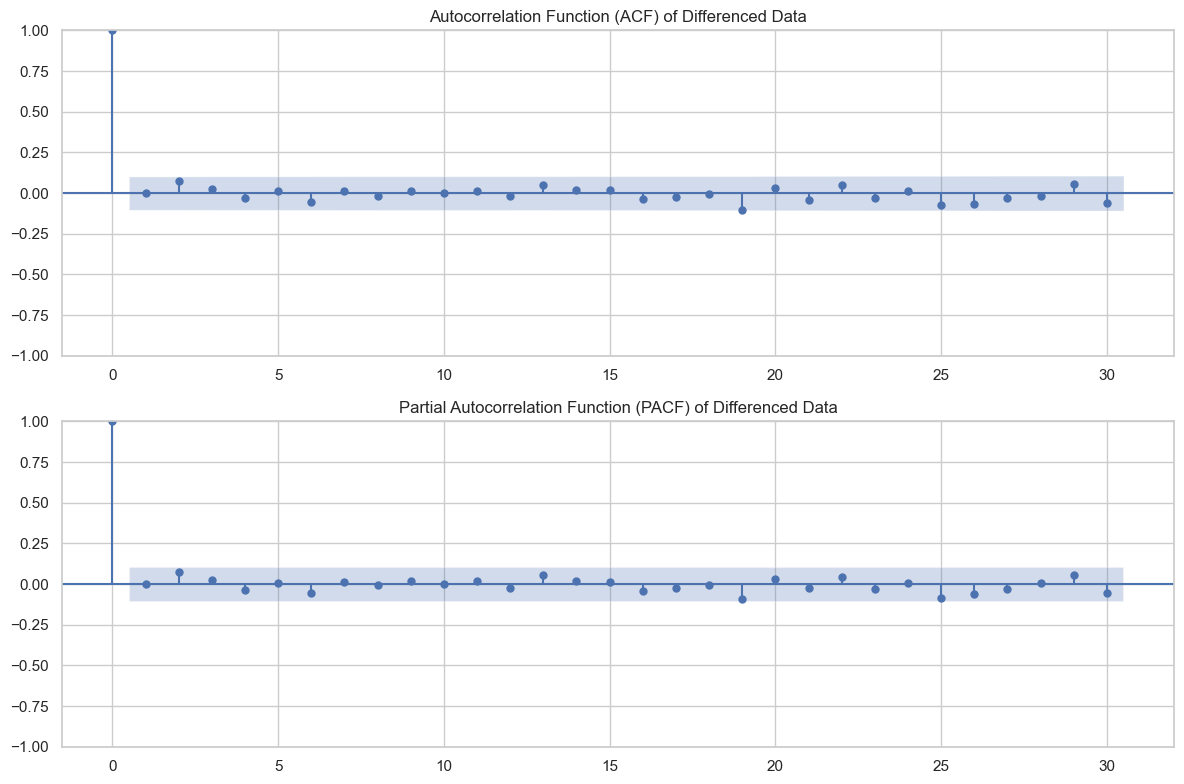

In [157]:
# Set up the figure for the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot for differenced data
plot_acf(daily_sales['Amount'], lags=30, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF) of Differenced Data')

# PACF plot for differenced data
plot_pacf(daily_sales['Amount'], lags=30, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF) of Differenced Data')

plt.tight_layout()
plt.show()


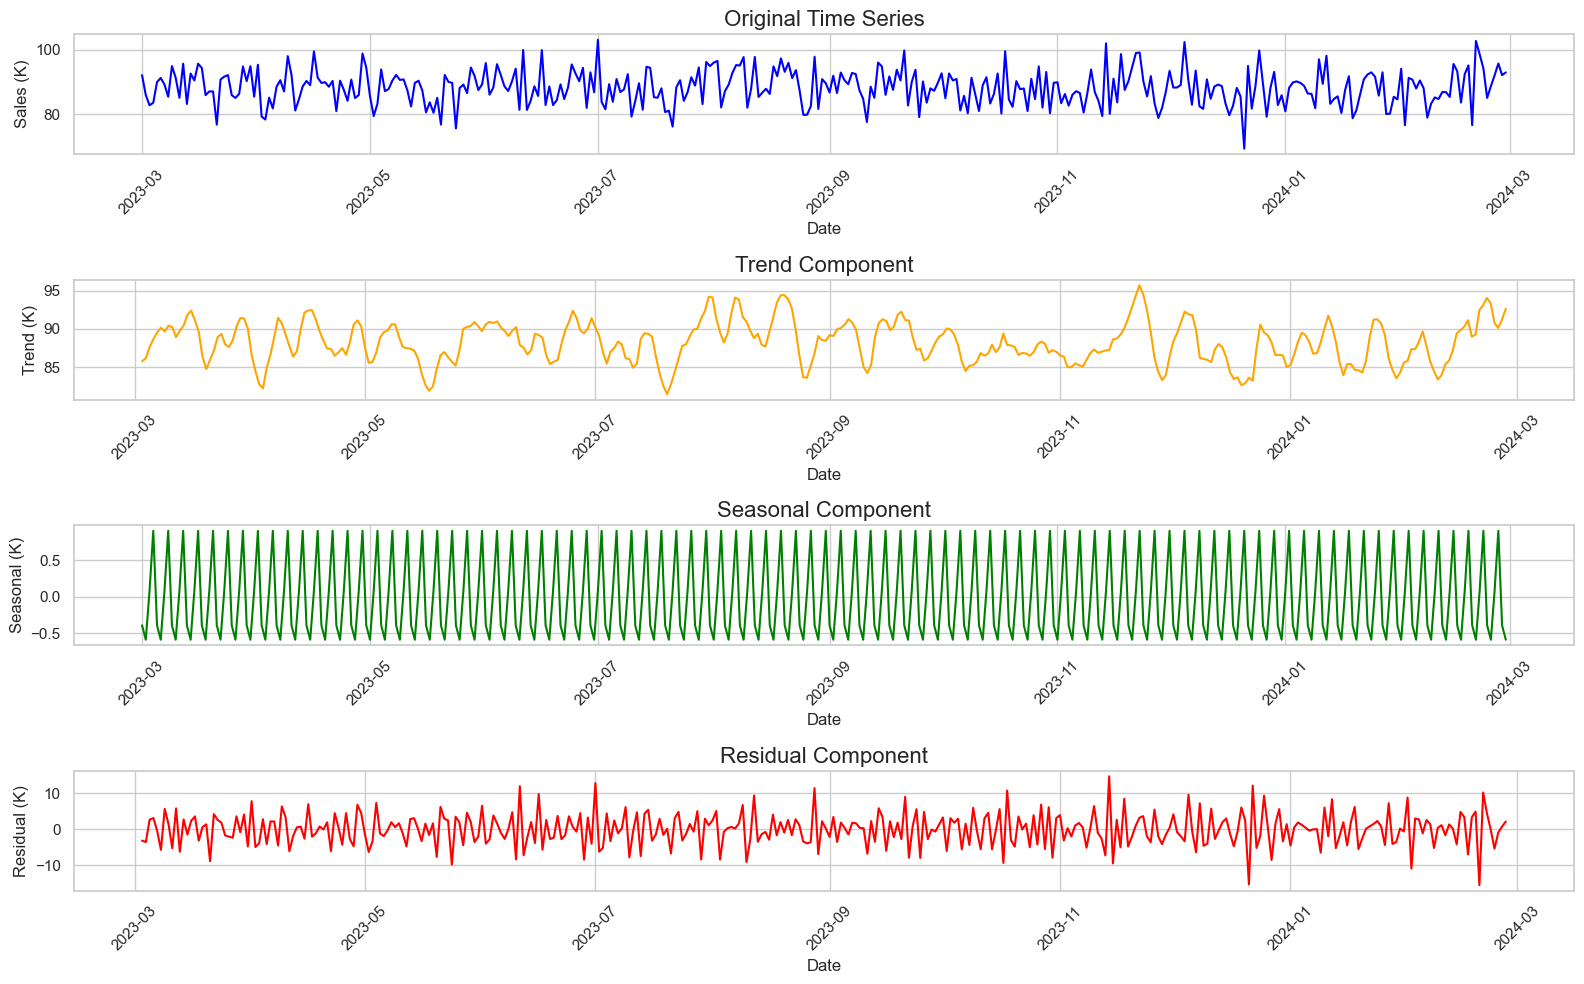

In [159]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales['Amount'], model='additive', period=4)

# Create a figure for custom plotting
plt.figure(figsize=(16, 10))

# Customize each component's plot
# Plot the original time series
plt.subplot(4, 1, 1)
plt.plot(daily_sales.index, daily_sales['Amount'], label='Original', color='blue')
plt.title('Original Time Series', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (K)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Trend (K)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Seasonal (K)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Residual (K)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [161]:
# Searching over model orders
results = pm.auto_arima(daily_sales['Amount'], # data
                        seasonal=True, # is the time series seasonal
                        m=4, # the seasonal period,
                        d = 0,
                        D=0, # seasonal difference order
                        start_p=1, # initial guess for P
                        start_q=1, # initial guess for Q
                        max_p=4, # max value of P to test
                        max_q=4, # max value of Q to test
                        information_criterion='bic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True,
                       )
print(results)
print(results.summary())

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(1,0,1)[4] intercept   : BIC=inf, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : BIC=2292.358, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : BIC=2303.991, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : BIC=2303.800, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[4]             : BIC=4325.554, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : BIC=2297.915, Time=0.39 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : BIC=2297.901, Time=0.97 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : BIC=inf, Time=1.46 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : BIC=2298.259, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : BIC=2298.259, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : BIC=2304.133, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 5.642 seconds
 ARIMA(0,0,0)(0,0,0)[4] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observa

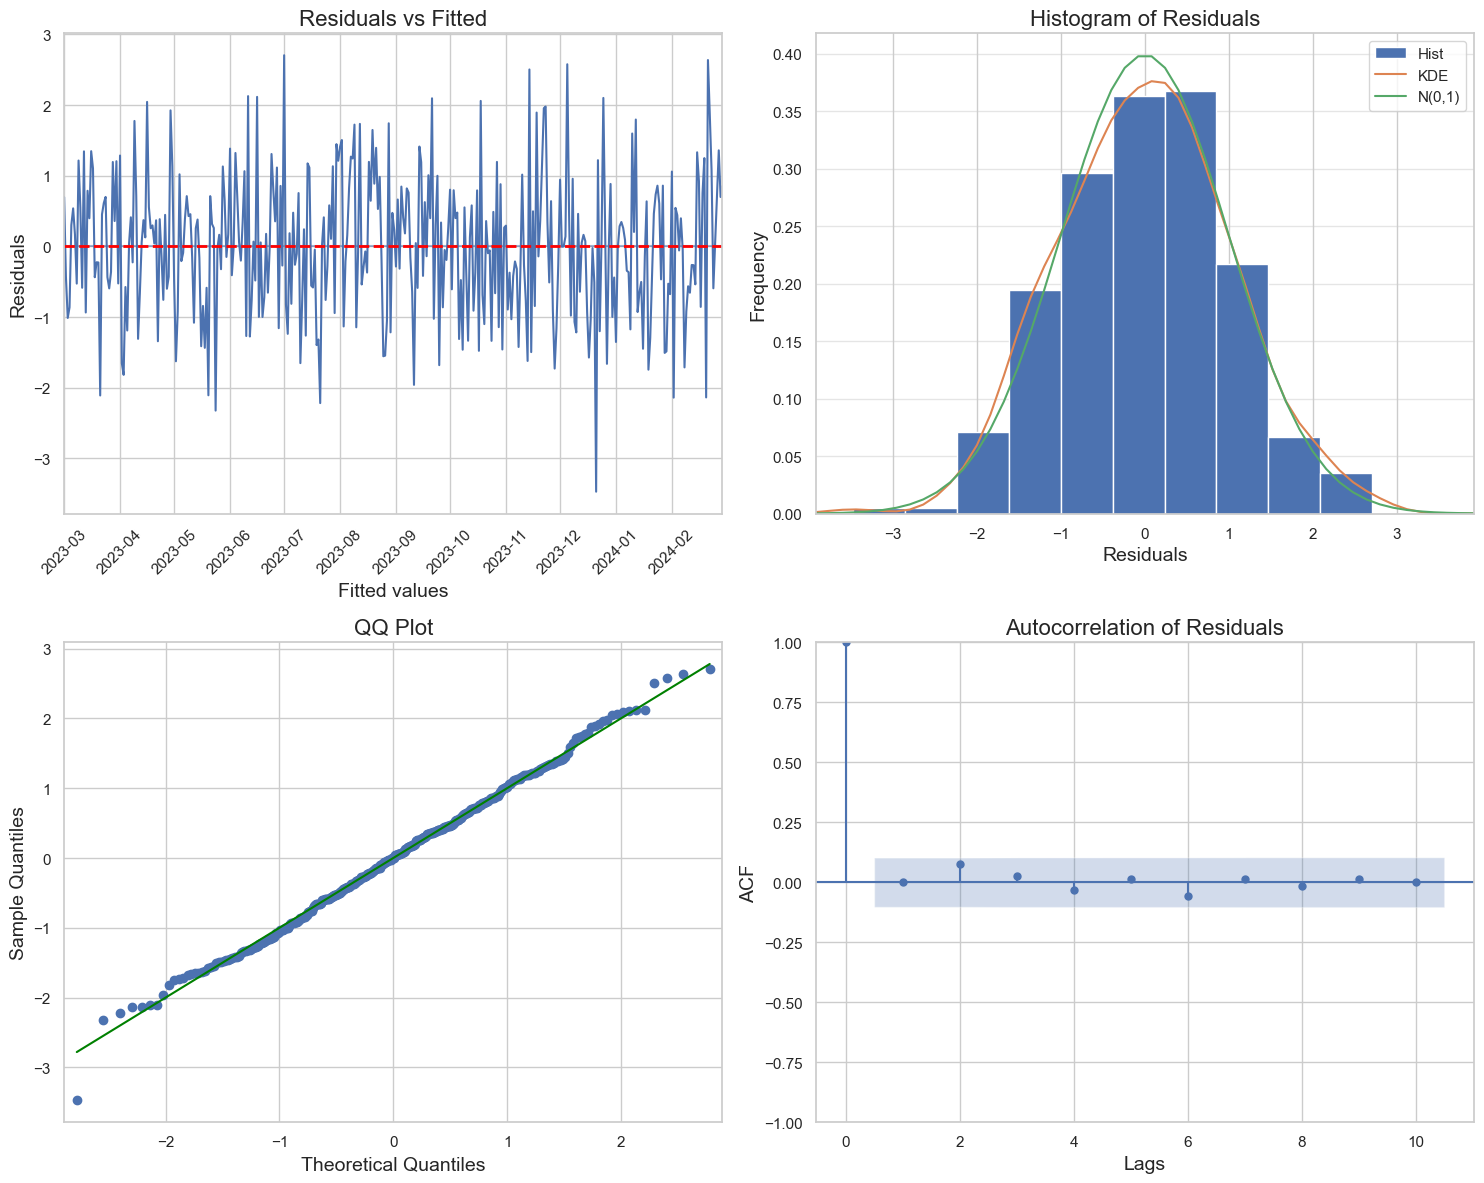

In [163]:
# Get the diagnostic plots
fig = results.plot_diagnostics(figsize=(15, 12))

# Customize the first plot (Residuals vs. Fitted)
ax1 = fig.axes[0]
ax1.set_title('Residuals vs Fitted', fontsize=16)
ax1.set_xlabel('Fitted values', fontsize=14)
ax1.set_ylabel('Residuals', fontsize=14)
ax1.axhline(0, color='red', linestyle='--', linewidth=2)

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(45)  # Rotate the labels by 45 degrees

# Customize the second plot (Histogram of Residuals)
ax2 = fig.axes[1]
ax2.set_title('Histogram of Residuals', fontsize=16)
ax2.set_xlabel('Residuals', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.grid(axis='y', alpha=0.5)
# Customize the third plot (QQ-Plot)
ax3 = fig.axes[2]
ax3.set_title('QQ Plot', fontsize=16)
ax3.set_xlabel('Theoretical Quantiles', fontsize=14)
ax3.set_ylabel('Sample Quantiles', fontsize=14)
ax3.get_lines()[1].set_color('green')  # Change color of the 45-degree line

# Customize the fourth plot (Residuals Autocorrelation)
ax4 = fig.axes[3]
ax4.set_title('Autocorrelation of Residuals', fontsize=16)
ax4.set_xlabel('Lags', fontsize=14)
ax4.set_ylabel('ACF', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

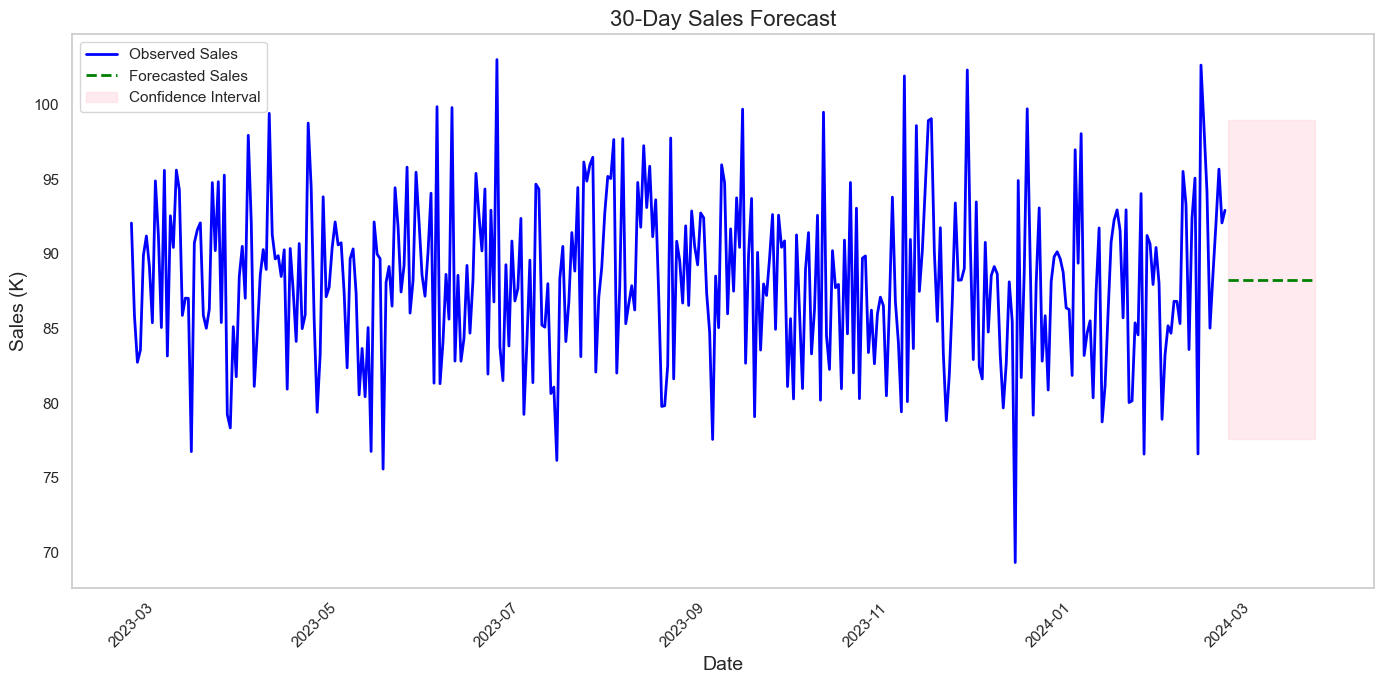

In [165]:
# Forecast for the next 30 days
daily_sales.reset_index(inplace=True)
n_periods = 30
forecast, conf_int = results.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for the forecasted period
forecast_index = pd.date_range(start=daily_sales['Datetime'].iloc[-1] + pd.Timedelta(days=1), periods=n_periods)

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame(forecast, columns=['Forecasted Amount'])
forecast_df.set_index(forecast_index,inplace = True)

# Ensure confidence intervals are in a DataFrame for plotting
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Plot the results
plt.figure(figsize=(14, 7))
# Plot observed sales
plt.plot(daily_sales['Datetime'], daily_sales['Amount'], label='Observed Sales', color='blue', linewidth=2)
# Plot forecasted sales
plt.plot(forecast_df.index, forecast_df['Forecasted Amount'], label='Forecasted Sales', color='green', linestyle='--', linewidth=2)
# Fill between for confidence intervals
plt.fill_between(conf_int_df.index,
                 conf_int_df['Lower CI'],
                 conf_int_df['Upper CI'], color='pink', alpha=0.3, label='Confidence Interval')

# Add labels and title
plt.title('30-Day Sales Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (K)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [167]:
delivered_orders[['Ratings']].head()

Ratings
0        1
1        4
2        1
3        4
4        5

count    126769.000000
mean          3.159187
std           1.305316
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ratings, dtype: float64


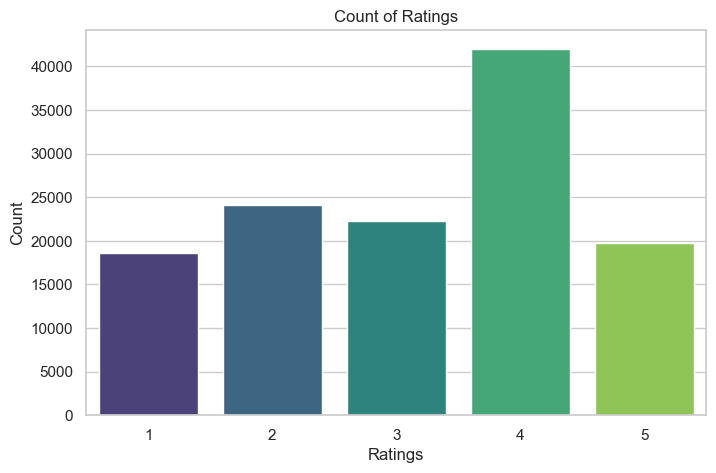

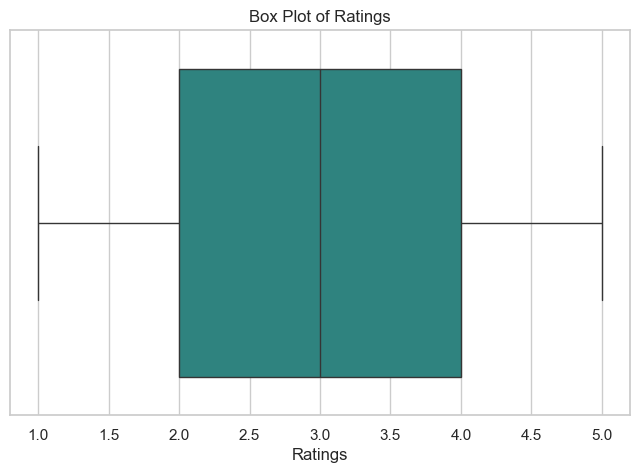

In [171]:
# Descriptive statistics
ratings_stats = delivered_orders['Ratings'].describe()
print(ratings_stats)

# Visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=delivered_orders, x='Ratings', palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Box plot to visualize the spread of ratings
plt.figure(figsize=(8, 5))
sns.boxplot(data=delivered_orders, x='Ratings', palette='viridis')
plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.show()

In [173]:
# Columns to exclude
excluded_columns = ['Name', 'Address', 'Age', 'Amount', 'Date', 'Datetime', 'Email',
                    'Feedback', 'Frequency', 'Monetary', 'Month', 'Phone',
                    'Recency', 'Segment', 'Year', 'Zipcode', 'Ratings']

# Get the remaining columns
cols = delivered_orders.columns.difference(excluded_columns)

# Dictionary to store results for each column
results_dict = {}

# Loop through each remaining column
for col in cols:
    # Group by the column and calculate the mean rating and total transactions
    mean_ratings = delivered_orders.groupby(col).agg(
        Mean_Rating=('Ratings', 'mean'),
        Total_Transactions=('Ratings', 'count')
    ).reset_index()
    
    # Filter for means < 2 or > 4
    filtered_means = mean_ratings[(mean_ratings['Mean_Rating'] < 2.8) | (mean_ratings['Mean_Rating'] > 4)]
    # Exclude groups with fewer than 5 transactions
    filtered_means = filtered_means[filtered_means['Total_Transactions'] >= 5]
    
    # Store results in the dictionary if there are any
    if not filtered_means.empty:
        results_dict[col] = filtered_means

# Now, each column's results can be accessed via results_dict
# For example, to access the DataFrame for a specific column:
# df_for_column = results_dict['ColumnName']

# Assign each DataFrame to a separate variable
for column_name, df in results_dict.items():
    globals()[f"Feedback_{column_name}"] = df  # Create variable with name df_<column_name>
    print(f"\nAnalysis for {column_name}:")
    print(df)


Analysis for Age_Group:
  Age_Group  Mean_Rating  Total_Transactions
0     18-25      2.79683               54442

Analysis for City:
              City  Mean_Rating  Total_Transactions
16          Boston     2.770189                2328
43      Fort Worth     2.773789                4540
100     Portsmouth     2.791681               11516
107  San Francisco     2.609972                9807

Analysis for Product_Brand:
  Product_Brand  Mean_Rating  Total_Transactions
3      BlueStar     4.398098                2208

Analysis for Product_Type:
  Product_Type  Mean_Rating  Total_Transactions
2  BlueStar AC     4.398098                2208

Analysis for State:
         State  Mean_Rating  Total_Transactions
11     Georgia     2.764228                2337
20       Maine     2.609704                9831
32  New Mexico     2.777875                4565

Analysis for new_customer_id:
       new_customer_id  Mean_Rating  Total_Transactions
246                684     2.714286                   

In [175]:
Feedback_products

products  Mean_Rating  Total_Transactions
48         Cassette AC     4.023370                 813
52          Central AC     4.051843                 868
104        Ductless AC     4.018029                 832
121  Floor-standing AC     4.016270                 799
154        Inverter AC     4.058126                 843
183      Mini-split AC     4.083620                 873
205         Package AC     4.372727                 220
221        Portable AC     4.073201                 806
267           Split AC     4.045000                 800

In [177]:
# Define satisfaction thresholds
satisfied_threshold = 4
not_satisfied_threshold = 3

# Create a new column to classify customers
Feedback_new_customer_id.loc[Feedback_new_customer_id['Mean_Rating'] > satisfied_threshold, 'Satisfaction_Status'] = 'Satisfied'
Feedback_new_customer_id.loc[Feedback_new_customer_id['Mean_Rating'] < not_satisfied_threshold, 'Satisfaction_Status'] = 'Not Satisfied'

# Filter satisfied and not satisfied customers
satisfied_customers = Feedback_new_customer_id[Feedback_new_customer_id['Satisfaction_Status'] == 'Satisfied']
not_satisfied_customers = Feedback_new_customer_id[Feedback_new_customer_id['Satisfaction_Status'] == 'Not Satisfied']

In [179]:
satisfied_customers

new_customer_id  Mean_Rating  Total_Transactions Satisfaction_Status
4745             10434     4.200000                   5           Satisfied
28092            33781     4.200000                   5           Satisfied
37612            43301     4.285714                   7           Satisfied
50759            84274     4.200000                   5           Satisfied

In [181]:
not_satisfied_customers

new_customer_id  Mean_Rating  Total_Transactions Satisfaction_Status
246                684     2.714286                   7       Not Satisfied
247                686     2.600000                   5       Not Satisfied
275                764     2.200000                   5       Not Satisfied
453               1252     2.666667                   6       Not Satisfied
586               1643     2.600000                   5       Not Satisfied
1019              2817     2.777778                   9       Not Satisfied
1624              4560     2.600000                   5       Not Satisfied
4744             10433     2.600000                   5       Not Satisfied
8849             14538     2.400000                   5       Not Satisfied
10905            16594     2.500000                  10       Not Satisfied
11291            16980     1.500000                   6       Not Satisfied
11456            17145     2.625000                   8       Not Satisfied
11636            17325     2.250000                   8       Not Satisfied
11918            17607     1.800000                  10       Not Satisfied
12509            18198     2.600000                   5       Not Satisfied
12914            18603     2.200000                   5       Not Satisfied
13399            19088     2.500000                   6       Not Satisfied
13627            19316     2.428571                   7       Not Satisfied
13740            19429     2.200000                   5       Not Satisfied
13971            19660     2.625000                   8       Not Satisfied
15036            20725     2.250000                   8       Not Satisfied
15041            20730     2.714286                  14       Not Satisfied
15046            20735     2.666667                   6       Not Satisfied
15924            21613     1.800000                   5       Not Satisfied
16443            22132     2.500000                   6       Not Satisfied
16447            22136     2.428571                   7       Not Satisfied
18728            24417     2.666667                   6       Not Satisfied
20206            25895     2.400000                   5       Not Satisfied
20790            26479     2.500000                   8       Not Satisfied
23597            29286     2.600000                   5       Not Satisfied
23802            29491     2.500000                   6       Not Satisfied
24647            30336     2.750000                   8       Not Satisfied
24999            30688     2.571429                   7       Not Satisfied
25231            30920     2.714286                   7       Not Satisfied
26256            31945     2.200000                   5       Not Satisfied
28121            33810     2.600000                   5       Not Satisfied
31279            36968     2.600000                   5       Not Satisfied
31455            37144     2.600000                   5       Not Satisfied
31817            37506     2.500000                   6       Not Satisfied
35529            41218     2.000000                   5       Not Satisfied
41150            53801     2.200000                   5       Not Satisfied
42780            59061     2.600000                   5       Not Satisfied
42978            59705     2.714286                   7       Not Satisfied
43899            62650     2.600000                   5       Not Satisfied
44984            66121     2.666667                   9       Not Satisfied
46143            69551     2.000000                   6       Not Satisfied
46287            69989     2.571429                   7       Not Satisfied
46905            71807     2.600000                   5       Not Satisfied
48281            75966     2.200000                   5       Not Satisfied
49750            80363     1.800000                   5       Not Satisfied
49955            81072     2.200000                   5       Not Satisfied
57647           109188     2.400000                   5